# APS Failure at Scania Trucks Data Set 

## 1. Business Problem

## 1.1. Description

#### Description

The dataset consists of data collected from heavy Scania 
trucks in everyday usage. The system in focus is the 
Air Pressure system (APS) which generates pressurised 
air that are utilized in various functions in a truck, 
such as braking and gear changes. The datasets' 
positive class consists of component failures 
for a specific component of the APS system. 
The negative class consists of trucks with failures 
for components not related to the APS. The data consists 
of a subset of all available data, selected by experts. 


The training set contains 60000 examples in total in which 59000 belong to the negative class and 1000 positive class. The test set contains 16000 examples. There are 171 attributes per record.

The attribute names of the data have been anonymized for proprietary reasons. It consists of both single numerical counters and histograms consisting of bins with different conditions. Typically the histograms have open-ended conditions at each end. For example, if we measuring the ambient temperature "T" then the histogram could be defined with 4 bins where:

The attributes are as follows: class, then anonymized operational data. The operational data have an identifier and a bin id, like "Identifier_Bin". In total there are 171 attributes, of which 7 are histogram variables. Missing values are denoted by "na".


The total cost of a prediction model the sum of Cost_1 multiplied by the number of Instances with type 1 failure and Cost_2 with the number of instances with type 2 failure, resulting in a Total_cost. In this case Cost_1 refers to the cost that an unnecessary check needs to be done by an mechanic at an workshop, while Cost_2 refer to the cost of missing a faulty truck, which may cause a breakdown. Cost_1 = 10 and Cost_2 = 500, and ,<br> **Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.**






## Problem Statement
**Predict APS failure accurately and minimizes the cost of failures**

## 1.2. Source/Useful links

Data Source : https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks (or) <br> https://www.kaggle.com/uciml/aps-failure-at-scania-trucks-data-set (or) <br> https://ida2016.blogs.dsv.su.se/?page_id=1387<br>
Research Paper : https://www.researchgate.net/publication/309195602_Prediction_of_Failures_in_the_Air_Pressure_System_of_Scania_Trucks_Using_a_Random_Forest_and_Feature_Engineering

## 1.3. Real World/Business Objectives and Constraints

- Acurately predict APS Failure
- Minimize cost
- No strict latency constraint

# 2. Machine Learning Problem

### 2.1. Data

**Refer:** https://ida2016.blogs.dsv.su.se/?page_id=1387
**Refer:** https://www.kaggle.com/uciml/aps-failure-at-scania-trucks-data-set

All the data in 2 files train.csv and test.csv

**Train.csv** contains 60k data poins and 171 columns
**Test.csv** contains 16k data points and  171 columns.

### 2.2 Mapping the real-world problem to a Machine Learning Problem 

#### 2.2.1. Type of Machine Learning Problem

**This is binary classification problem**

#### 2.2.2. Performance metric

Here we need very low false negative and also low false postive.

- **Recall Score**

# 3. Exploratory data analysiss

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import re
import os
import datetime as dt
import pickle
from datetime import datetime
from scipy import stats
import random
from sklearn.model_selection import KFold
from IPython.display import display, Markdown
import pickle
from sklearn import metrics
from pandas import Series
from collections import defaultdict
import math


from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn import metrics

from sklearn.metrics import f1_score, auc, accuracy_score, recall_score, precision_score, precision_recall_curve,\
confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV

## 3.1 Train Data

In [3]:
train = pd.read_csv("aps_failure_training_set.csv", na_values="na")
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [4]:
train.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [5]:
train['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

**This is a highly imbalanced dataset.**

In [6]:
# Checking missing values
train.isnull().any().value_counts()

True     169
False      2
dtype: int64

In [7]:
# Checking missing values
train.isnull().sum(axis = 0)

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
          ...  
dl_000     4008
dm_000     4009
dn_000      691
do_000     2724
dp_000     2726
dq_000     2726
dr_000     2726
ds_000     2727
dt_000     2727
du_000     2726
dv_000     2726
dx_000     2723
dy_000     2724
dz_000     2723
ea_000     2723
eb_000     4007
ec_00     10239
ed_000     9553
ee_000      671
ee_001      671
ee_002      671
ee_003      671
ee_004      671
ee_005      671
ee_006      671
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int6

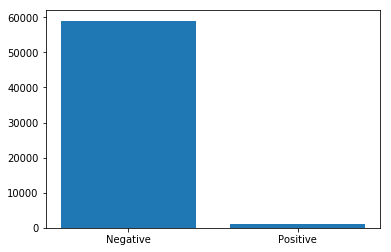

In [9]:
y_pos = np.arange(2) 
# Create bars
plt.bar(y_pos, list(train['class'].value_counts()))
 
# Create names on the x-axis
plt.xticks(y_pos, ["Negative", "Positive"])
 
# Show graphic
plt.show()
 

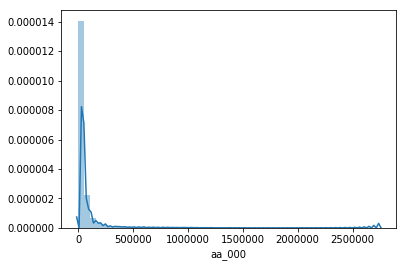

In [26]:
sns.distplot(train['aa_000'])

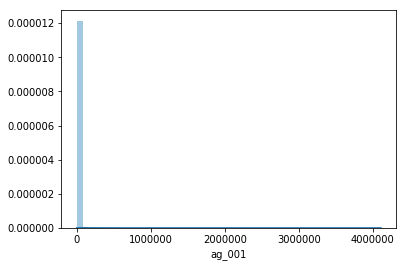

In [27]:
sns.distplot(train['ag_001'])

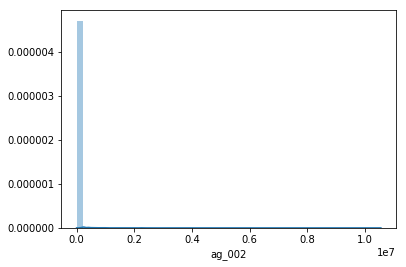

In [28]:
sns.distplot(train['ag_002'])

## 3.2. Test Data

In [10]:
test = pd.read_csv("aps_failure_test_set.csv", na_values="na")
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [11]:
test.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,1.600000e+04,3637.000000,1.507400e+04,12019.000000,15310.000000,15310.000000,15811.000000,1.581100e+04,1.581100e+04,1.581100e+04,...,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,15238.000000,15238.000000
mean,6.799698e+04,0.772065,3.580393e+08,439.498794,6.428347,10.195950,120.858516,2.064204e+03,1.379236e+04,1.126276e+05,...,4.649135e+05,2.212010e+05,4.690886e+05,4.256696e+05,3.559239e+05,3.524014e+05,1.442759e+05,8.560355e+03,0.064969,0.242683
std,5.035350e+05,2.589224,7.966968e+08,1551.328109,118.186469,167.260463,6454.660300,8.925778e+04,2.358405e+05,1.025843e+06,...,1.255197e+06,5.828691e+05,1.267550e+06,1.259560e+06,1.199544e+06,1.628545e+06,5.368225e+05,5.329946e+04,3.374657,14.339059
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9.280000e+02,0.000000,1.600000e+01,26.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,3.178000e+03,1.256000e+03,2.883500e+03,3.869500e+03,6.100000e+02,1.240000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.098200e+04,0.000000,1.590000e+02,130.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.409860e+05,1.147800e+05,2.297080e+05,1.956510e+05,9.657000e+04,4.201300e+04,3.985000e+03,0.000000e+00,0.000000,0.000000
75%,4.947900e+04,0.000000,1.003500e+03,430.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.391320e+05,2.189510e+05,4.714860e+05,4.034105e+05,2.790355e+05,1.699100e+05,1.389310e+05,1.907000e+03,0.000000,0.000000
max,4.294967e+07,58.000000,2.130707e+09,87038.000000,11044.000000,14186.000000,736174.000000,1.047252e+07,1.914916e+07,7.305747e+07,...,5.382333e+07,2.207969e+07,4.859750e+07,5.604348e+07,4.215944e+07,4.747137e+07,1.718575e+07,4.570398e+06,340.000000,1720.000000


In [12]:
test['class'].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

**This is a highly imbalanced dataset.**

In [13]:
# Checking missing values
test.isnull().any().value_counts()

True     169
False      2
dtype: int64

In [14]:
# Checking missing values
test.isnull().sum(axis = 0)

class         0
aa_000        0
ab_000    12363
ac_000      926
ad_000     3981
ae_000      690
af_000      690
ag_000      189
ag_001      189
ag_002      189
ag_003      189
ag_004      189
ag_005      189
ag_006      189
ag_007      189
ag_008      189
ag_009      189
ah_000      175
ai_000      163
aj_000      163
ak_000     1198
al_000      169
am_0        163
an_000      169
ao_000      162
ap_000      169
aq_000      162
ar_000      764
as_000      163
at_000      163
          ...  
dl_000     1094
dm_000     1094
dn_000      190
do_000      764
dp_000      764
dq_000      764
dr_000      764
ds_000      764
dt_000      764
du_000      764
dv_000      764
dx_000      764
dy_000      764
dz_000      762
ea_000      762
eb_000     1094
ec_00      2644
ed_000     2459
ee_000      192
ee_001      192
ee_002      192
ee_003      192
ee_004      192
ee_005      192
ee_006      192
ee_007      192
ee_008      192
ee_009      192
ef_000      762
eg_000      762
Length: 171, dtype: int6

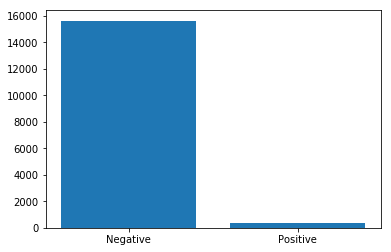

In [15]:
y_pos = np.arange(2) 
# Create bars
plt.bar(y_pos, list(test['class'].value_counts()))
 
# Create names on the x-axis
plt.xticks(y_pos, ["Negative", "Positive"])
 
# Show graphic
plt.show()
 

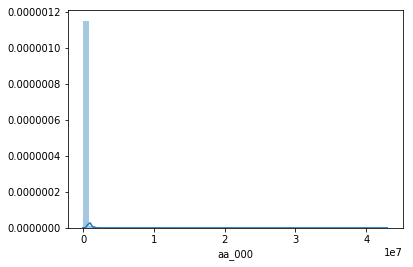

In [29]:
sns.distplot(test['aa_000'])

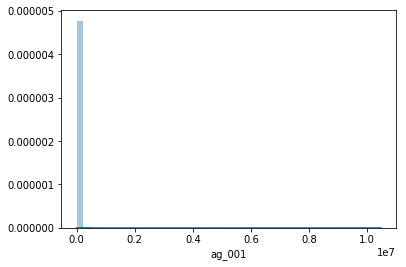

In [30]:
sns.distplot(test['ag_001'])

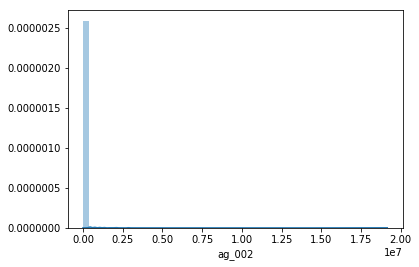

In [31]:
sns.distplot(test['ag_002'])

 - Here we have two many columns i.e. 170 columns 
 - We cant visualize 170 columns.
 - From columns's distributions we can't interpreat any useful info.

# 4. Preprocessing Data

In [16]:
# mapping class column pos to 1 and neg to -1
train['class'] = train['class'].apply(lambda x: 1 if x=='pos' else 0)

In [17]:
# mapping class column pos to 1 and neg to -1
test['class'] = test['class'].apply(lambda x: 1 if x=='pos' else 0)

In [18]:
print(train['class'].value_counts())
print(test['class'].value_counts())

0    59000
1     1000
Name: class, dtype: int64
0    15625
1      375
Name: class, dtype: int64


In [19]:
y_train = train[['class']]
train = train.drop(['class'], axis=1)

In [20]:
y_test = test[['class']]
test = test.drop(['class'], axis=1)

In [21]:
train, cv, y_train, y_cv = train_test_split(train, y_train, stratify=y_train, \
                                                        test_size=0.15, random_state=42)

In [22]:
print(y_train['class'].value_counts())
print(y_cv['class'].value_counts())
print(y_test['class'].value_counts())

0    50150
1      850
Name: class, dtype: int64
0    8850
1     150
Name: class, dtype: int64
0    15625
1      375
Name: class, dtype: int64


In [23]:
y_train.to_csv('y_train.csv', index=False)
y_cv.to_csv('y_cv.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# 3.2. Impute Missing Data

### Impute technique used:
 - Mean Impute
 - Median Impute
 - Mode Impute

### 3.2.1. Mean Impute

In [24]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(train)
train_mean = pd.DataFrame(imp_mean.transform(train), columns=train.columns)
cv_mean = pd.DataFrame(imp_mean.transform(cv), columns=train.columns)
test_mean = pd.DataFrame(imp_mean.transform(test), columns=test.columns)

In [25]:
train_mean.isnull().any().value_counts()

False    170
dtype: int64

In [26]:
cv_mean.isnull().any().value_counts()

False    170
dtype: int64

In [27]:
test_mean.isnull().any().value_counts()

False    170
dtype: int64

In [28]:
train_mean.to_csv('train_mean.csv', index=False)
train_mean = pd.read_csv('train_mean.csv')

cv_mean.to_csv('cv_mean.csv', index=False)
cv_mean = pd.read_csv('cv_mean.csv')

test_mean.to_csv('test_mean.csv', index=False)
test_mean = pd.read_csv('test_mean.csv')

train_mean.head(2)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,36.0,0.000000,1.000000e+01,10.0,0.0,0.0,0.0,0.0,0.0,3554.0,...,390.0,162.0,196.0,96.0,64.0,48.0,0.0,0.0,0.0,0.0
1,41968.0,0.703535,2.130706e+09,504.0,0.0,0.0,0.0,0.0,0.0,0.0,...,243262.0,112754.0,227390.0,203184.0,219772.0,195224.0,558952.0,786.0,0.0,0.0


In [29]:
scaler = StandardScaler().fit(train_mean)
train_mean_std = pd.DataFrame(scaler.transform(train_mean), columns=train.columns)
cv_mean_std = pd.DataFrame(scaler.transform(cv_mean), columns=train.columns)
test_mean_std = pd.DataFrame(scaler.transform(test_mean), columns=test.columns)

In [30]:
train_mean_std.to_csv('train_mean_std.csv', index=False)
train_mean_std = pd.read_csv('train_mean_std.csv')

cv_mean_std.to_csv('cv_mean_std.csv', index=False)
cv_mean_std = pd.read_csv('cv_mean_std.csv')

test_mean_std.to_csv('test_mean_std.csv', index=False)
test_mean_std = pd.read_csv('test_mean_std.csv')

train_mean_std.head(2)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.407447,-4.363186e-01,-0.461393,-0.005897,-0.041565,-0.052024,-0.010993,-0.027914,-0.055693,-0.111962,...,-0.383251,-0.385655,-0.379104,-0.359158,-0.313062,-0.199682,-0.312578,-0.177443,-0.021434,-0.02376
1,-0.118016,-6.885387e-17,2.293303,-0.005884,-0.041565,-0.052024,-0.010993,-0.027914,-0.055693,-0.116670,...,-0.173974,-0.179740,-0.185468,-0.172611,-0.106110,-0.086357,0.956921,-0.160611,-0.021434,-0.02376


### 3.2.2. Median Impute

In [31]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median').fit(train)
train_median = pd.DataFrame(imp_median.transform(train), columns=train.columns)
cv_median = pd.DataFrame(imp_median.transform(cv), columns=train.columns)
test_median = pd.DataFrame(imp_median.transform(test), columns=test.columns)

In [32]:
train_median.isnull().any().value_counts()

False    170
dtype: int64

In [33]:
cv_median.isnull().any().value_counts()

False    170
dtype: int64

In [34]:
test_median.isnull().any().value_counts()

False    170
dtype: int64

In [35]:
train_median.to_csv('train_median.csv', index=False)
train_median = pd.read_csv('train_median.csv')

cv_median.to_csv('cv_median.csv', index=False)
cv_median = pd.read_csv('cv_median.csv')

test_median.to_csv('test_median.csv', index=False)
test_median = pd.read_csv('test_median.csv')

train_median.head(2)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,36.0,0.0,1.000000e+01,10.0,0.0,0.0,0.0,0.0,0.0,3554.0,...,390.0,162.0,196.0,96.0,64.0,48.0,0.0,0.0,0.0,0.0
1,41968.0,0.0,2.130706e+09,504.0,0.0,0.0,0.0,0.0,0.0,0.0,...,243262.0,112754.0,227390.0,203184.0,219772.0,195224.0,558952.0,786.0,0.0,0.0


In [36]:
scaler = StandardScaler().fit(train_median)
train_median_std = pd.DataFrame(scaler.transform(train_median), columns=train.columns)
cv_median_std = pd.DataFrame(scaler.transform(cv_median), columns=train.columns)
test_median_std = pd.DataFrame(scaler.transform(test_median), columns=test.columns)

In [37]:
train_median_std.to_csv('train_median_std.csv', index=False)
train_median_std = pd.read_csv('train_median_std.csv')

cv_median_std.to_csv('cv_median_std.csv', index=False)
cv_median_std = pd.read_csv('cv_median_std.csv')

test_median_std.to_csv('test_median_std.csv', index=False)
test_median_std = pd.read_csv('test_median_std.csv')

train_median_std.head(2)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.407447,-0.097846,-0.433663,-0.004438,-0.039862,-0.049892,-0.010873,-0.027611,-0.055088,-0.110689,...,-0.381208,-0.383625,-0.376968,-0.357094,-0.310528,-0.197747,-0.309136,-0.175493,-0.020475,-0.022697
1,-0.118016,-0.097846,2.305939,-0.004425,-0.039862,-0.049892,-0.010873,-0.027611,-0.055088,-0.115396,...,-0.171969,-0.177746,-0.183369,-0.170581,-0.103633,-0.084440,0.959736,-0.158664,-0.020475,-0.022697


### 3.2.3. Mode Impute

In [38]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(train)
train_mode = pd.DataFrame(imp_mode.transform(train), columns=train.columns)
cv_mode = pd.DataFrame(imp_mode.transform(cv), columns=train.columns)
test_mode = pd.DataFrame(imp_mode.transform(test), columns=test.columns)

In [39]:
train_mode.isnull().any().value_counts()

False    170
dtype: int64

In [40]:
cv_mode.isnull().any().value_counts()

False    170
dtype: int64

In [41]:
test_mode.isnull().any().value_counts()

False    170
dtype: int64

In [42]:
train_mode.to_csv('train_mode.csv', index=False)
train_mode = pd.read_csv('train_mode.csv')

cv_mode.to_csv('cv_mode.csv', index=False)
cv_mode = pd.read_csv('cv_mode.csv')

test_mode.to_csv('test_mode.csv', index=False)
test_mode = pd.read_csv('test_mode.csv')

train_mode.head(2)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,36.0,0.0,1.000000e+01,10.0,0.0,0.0,0.0,0.0,0.0,3554.0,...,390.0,162.0,196.0,96.0,64.0,48.0,0.0,0.0,0.0,0.0
1,41968.0,0.0,2.130706e+09,504.0,0.0,0.0,0.0,0.0,0.0,0.0,...,243262.0,112754.0,227390.0,203184.0,219772.0,195224.0,558952.0,786.0,0.0,0.0


In [43]:
scaler = StandardScaler().fit(train_mode)
train_mode_std = pd.DataFrame(scaler.transform(train_mode), columns=train.columns)
cv_mode_std = pd.DataFrame(scaler.transform(cv_mode), columns=train.columns)
test_mode_std = pd.DataFrame(scaler.transform(test_mode), columns=test.columns)

In [44]:
train_mode_std.to_csv('train_mode_std.csv', index=False)
train_mode_std = pd.read_csv('train_mode_std.csv')

cv_mode_std.to_csv('cv_mode_std.csv', index=False)
cv_mode_std = pd.read_csv('cv_mode_std.csv')

test_mode_std.to_csv('test_mode_std.csv', index=False)
test_mode_std = pd.read_csv('test_mode_std.csv')

train_mode_std.head(2)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.407447,-0.097846,-0.433663,-0.004437,-0.039862,-0.049892,-0.010873,-0.027611,-0.055088,-0.110689,...,-0.378801,-0.381174,-0.374711,-0.355024,-0.309511,-0.197479,-0.309033,-0.175493,-0.020475,-0.022697
1,-0.118016,-0.097846,2.305939,-0.004424,-0.039862,-0.049892,-0.010873,-0.027611,-0.055088,-0.115396,...,-0.169689,-0.175423,-0.181223,-0.168606,-0.102667,-0.084177,0.959802,-0.158664,-0.020475,-0.022697


# 4. ML Models

In [2]:

def plot_grid_search(clf, X_train, y_train, C):

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']

    plt.plot(C, train_auc, label='Train Recall Score')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(C,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(C, cv_auc, label='Test Recall Score')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(C,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.legend()
    plt.xlabel("log(C): hyperparameter")
    plt.ylabel("Recall Score")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()


    
    
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(train_y, train_predict_y, test_y, test_predict_y):
    # Confusion Matrix
    
    confusion_matrix_train = confusion_matrix(train_y, train_predict_y)
    

    # Ploting heatmap of confusion matrix
    # https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
    class_names = ['negative','positive']
    confusion_matrix_train = pd.DataFrame(confusion_matrix_train,index=class_names, columns=class_names)
    heatmap = sns.heatmap(confusion_matrix_train, annot=True, fmt='g')

    plt.xlabel('Predicted Class',size=14)
    plt.ylabel('Actual Class',size=14)
    plt.title("Train Confusion Matrix\n",size=24)
    plt.show()
    
    C = confusion_matrix(test_y, test_predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    tn, fp, fn, tp = confusion_matrix(train_y, train_predict_y).ravel()
    print("Train Cost: ", (fp*10+fn*500))
    tn, fp, fn, tp = confusion_matrix(test_y, test_predict_y).ravel()
    print("Test Cost: ", (fp*10+fn*500))

    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,5))
    plt.suptitle("Test Confusion, Presicion & Recall Matrix", fontsize=24)
   
    labels = ['negative','positive']
    # representing A in heatmap format
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()
    
    
# ovrsampling training data only
# Ref: https://beckernick.github.io/oversampling-modeling/
from imblearn.over_sampling import SMOTE
def SMOTE_oversmapling(X, Y):
    sm = SMOTE(ratio = 1.0)
    X_ovs,Y_ovs = sm.fit_sample(X, Y)
    print(X_ovs.shape, Y_ovs.shape)
    print(np.bincount(Y_ovs))
    return X_ovs, Y_ovs



def plot_precision_recall_costs(model, data, y_true):
#     X_train, X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, \
#                                                         test_size=0.266666666666666667, random_state=42)
    X_test = data
    y_test = y_true
    y_pred = calib.predict_proba(data)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    thresholds = np.append(thresholds,1)

    costs = []

    for threshold in tqdm(thresholds):
        y_hat = y_pred > threshold
        tn, fp, fn, tp = confusion_matrix(y_true, y_hat).ravel()
        cost = fp*10+fn*500
        costs.append(cost)
    plt.figure(figsize=(20,6))

    plt.subplot(121)
    plt.plot(thresholds, precision, label='Precision')
    plt.plot(thresholds, recall, label='Recall')
    plt.legend()
    plt.xlabel("Thresholds")
    plt.ylabel("Precision_Recall")
    plt.title("Precision_Recall-Threshold Plot")
    plt.grid()

    plt.subplot(122)
    plt.plot(thresholds, costs, label='Costs')
    plt.legend()
    plt.xlabel("Thresholds")
    plt.ylabel("Costs")
    plt.title("Cost-Threshold Plot")
    plt.grid()


    plt.show()
    print("Best threshold: {:.4f}".format(thresholds[np.argsort(costs)[0]]))
    print("Min cost: {:.2f}".format(costs[np.argsort(costs)[0]]))
    return thresholds[np.argsort(costs)[0]], costs[np.argsort(costs)[0]]

    

Using TensorFlow backend.


# 4.1 Using Imbalance data

In [3]:
metric = []
base = 10
cv = 5

## 4.1.1. Mean Impute

In [71]:
X_train = pd.read_csv('train_mean.csv')
X_cv = pd.read_csv('cv_mean.csv')
X_test = pd.read_csv('test_mean.csv')

X_train_std = pd.read_csv('train_mean_std.csv')
X_cv_std = pd.read_csv('cv_mean_std.csv')
X_test_std = pd.read_csv('test_mean_std.csv')

y_train = pd.read_csv('y_train.csv')['class']
y_cv = pd.read_csv('y_cv.csv')['class']
y_test = pd.read_csv('y_test.csv')['class']

In [5]:
y_train.value_counts()

0    50150
1      850
Name: class, dtype: int64

In [6]:
y_cv.value_counts()

0    8850
1     150
Name: class, dtype: int64

In [7]:
y_test.value_counts()

0    15625
1      375
Name: class, dtype: int64

### 4.1.1.1. Logistic Regression

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed: 19.4min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 23.7min finished


LogisticRegression(C=1e-06, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 1e-06}


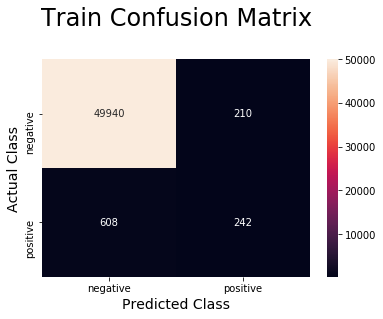

Train Cost:  306100
Test Cost:  129450


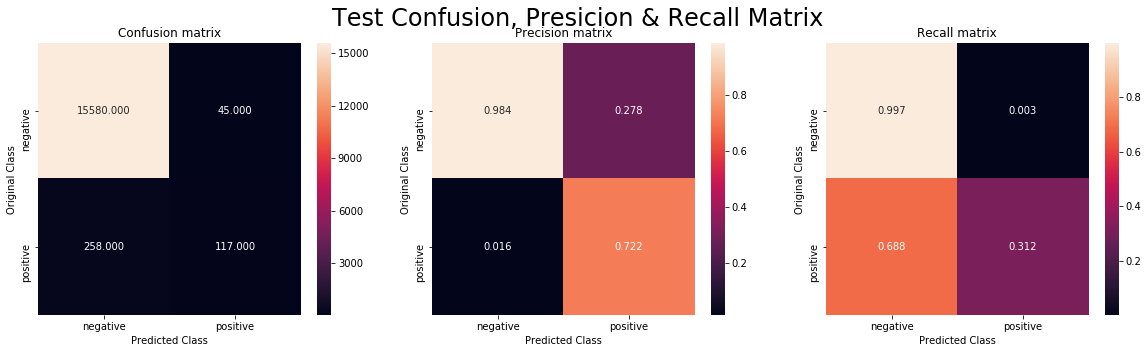

In [8]:

C = [math.pow(base,i) for i in range(-6,6)]
# H = [round(math.log(i,10)) for i in C]

tuned_parameters = [{'C': C}, {'penalty':['l1','l2']}, {'class_weight':[None,'balanced']}]

C = [round(math.log(i,base)) for i in C]
clf = GridSearchCV(LogisticRegression(), \
                   tuned_parameters, cv=cv, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(X_train_std, y_train)

# plot_grid_search(clf, X_train, y_train, C)
print(clf.best_estimator_)
print(clf.best_params_)
best_estimator = clf.best_estimator_



calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train_std, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train_std), y_test, calib.predict(X_test_std))

100%|██████████| 5509/5509 [02:05<00:00, 43.87it/s]


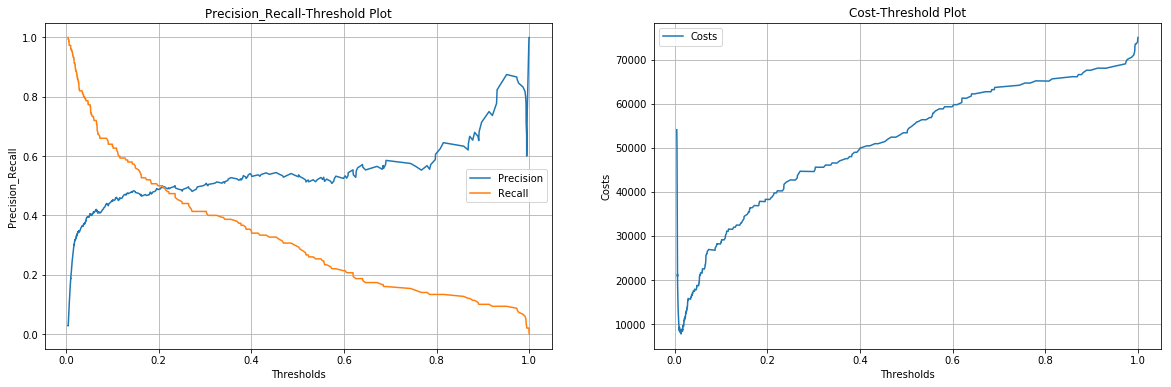

Best threshold: 0.0139
Min cost: 7770.00


In [9]:
threshold, cost = plot_precision_recall_costs(calib, X_cv_std, y_cv)

In [10]:
y_train_pred = calib.predict_proba(X_train_std)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test_std)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
metric.append(["Mean","Logistic Reg.", train_cost, cost, test_cost])

Train Cost:  59150
Test Cost:  15910


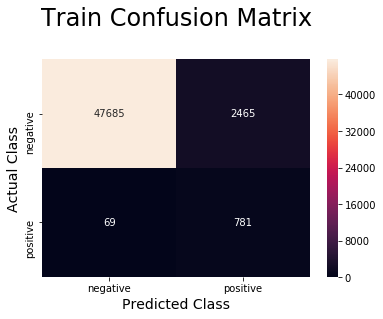

Train Cost:  59150
Test Cost:  15910


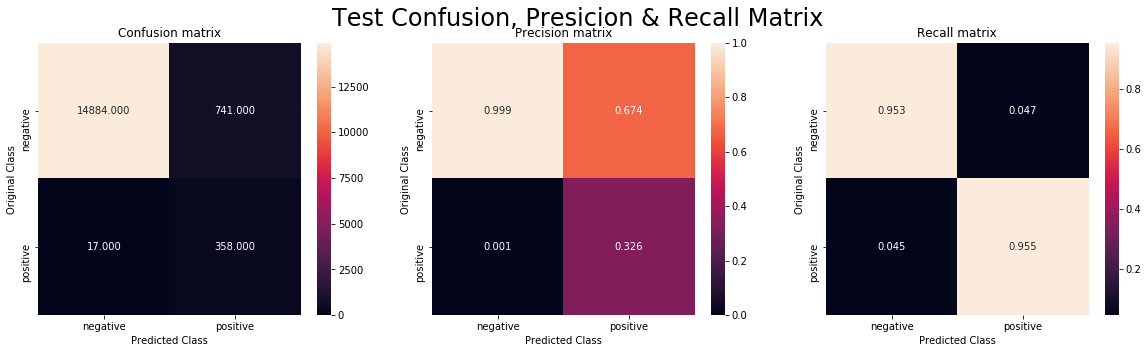

In [11]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

### 4.1.1.2. Support Vector Machine

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
{'class_weight': 'balanced'}


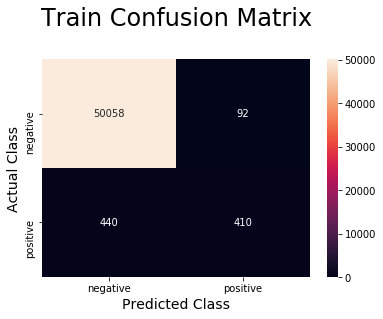

Train Cost:  220920
Test Cost:  96880


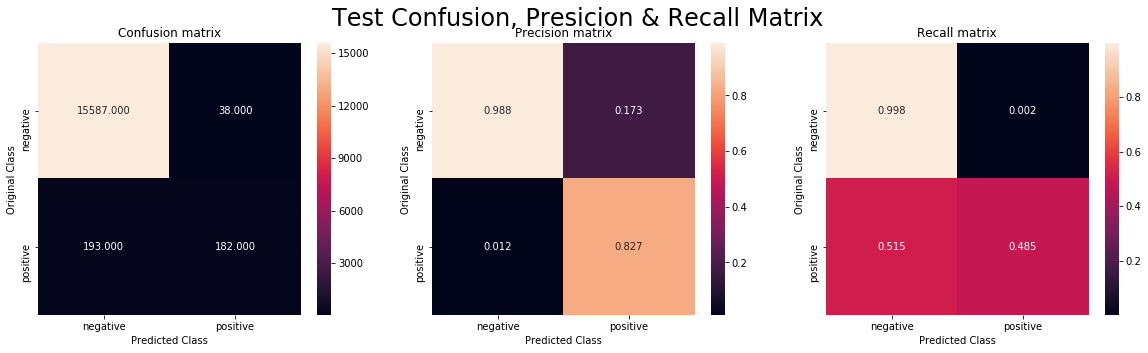

In [72]:
C = [math.pow(base,i) for i in range(-6,6)]
# H = [round(math.log(i,10)) for i in C]

tuned_parameters = [{'alpha': C}, {'penalty':['l1','l2']}, {'class_weight':[None,'balanced']}]


C = [round(math.log(i,base)) for i in C]
clf = GridSearchCV(SGDClassifier(loss="hinge",max_iter=1000, n_jobs=-1), \
                   tuned_parameters, cv=cv, scoring='recall', n_jobs=-1)
clf.fit(X_train_std, y_train)

# plot_grid_search(clf, X_train, y_train, C)
print(clf.best_estimator_)
print(clf.best_params_)
best_estimator = clf.best_estimator_



calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train_std, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train_std), y_test, calib.predict(X_test_std))

100%|██████████| 4534/4534 [01:44<00:00, 43.33it/s]


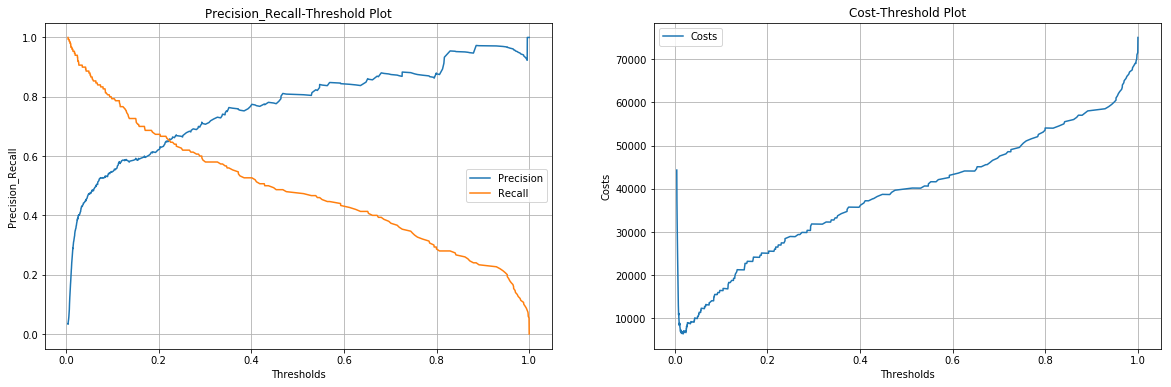

Best threshold: 0.0178
Min cost: 6420.00


In [74]:
threshold, cost = plot_precision_recall_costs(calib, X_cv_std, y_cv)

In [76]:
_stdy_train_pred = calib.predict_proba(X_train_std)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test_std)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
metric.append(["Mean","Lr. SVM", train_cost, cost, test_cost])

Train Cost:  22160
Test Cost:  13640


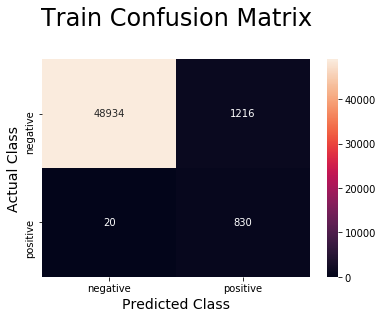

Train Cost:  22160
Test Cost:  13640


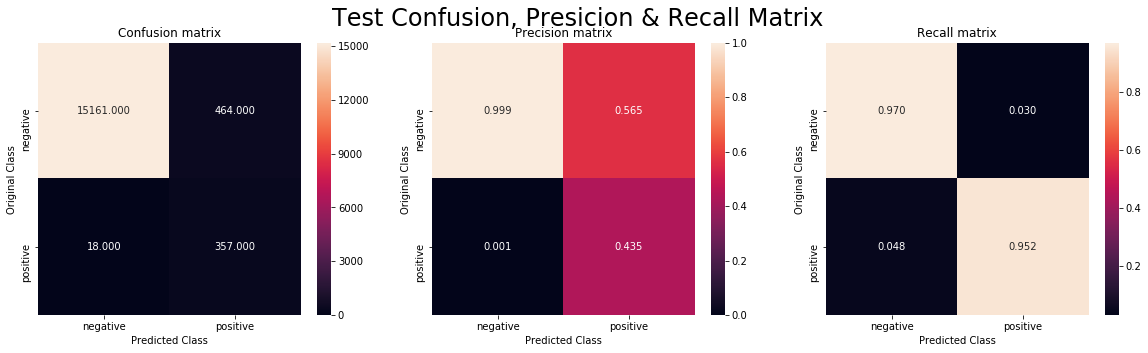

In [81]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

### 4.1.1.3. Random Forest

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.1min
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.5min
[Paral

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


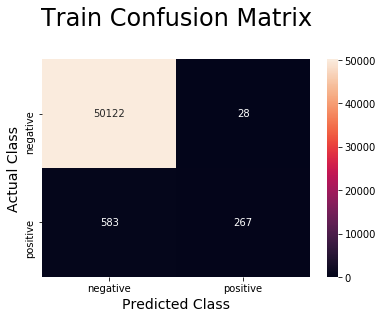

Train Cost:  291780
Test Cost:  139150


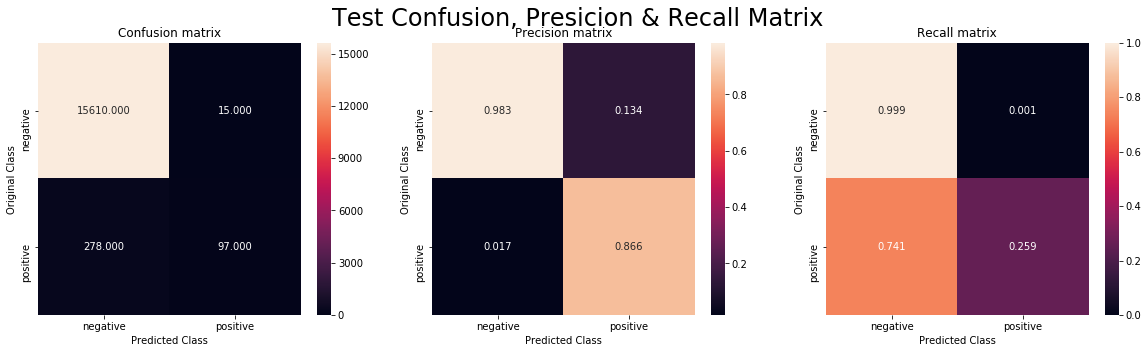

In [16]:
tuned_parameters = {"max_depth": [2, 3, 5, 8, 10, 15, 20, 25, 30, 40, 50],
              "n_estimators": [10, 20, 30, 40, 50, 80, 100, 150, 200],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
                "max_features": ['auto', 'sqrt'],
                "class_weight": ['balanced', 'balanced_subsample', None]
             }
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rf, tuned_parameters, cv=cv, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(X_train, y_train)


print(clf.best_estimator_)

best_estimator = clf.best_estimator_


calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train), y_test, calib.predict(X_test))

100%|██████████| 4519/4519 [01:43<00:00, 43.55it/s]


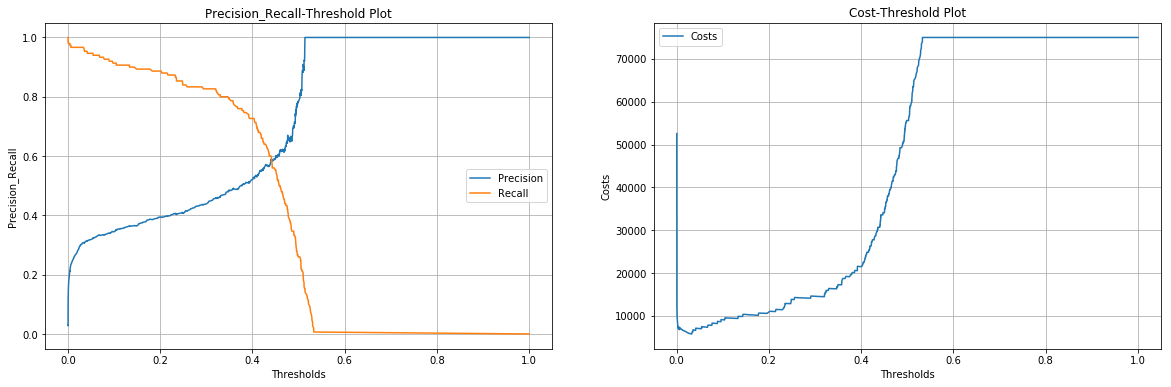

Best threshold: 0.0329
Min cost: 5750.00


In [17]:
threshold, cost = plot_precision_recall_costs(calib, X_cv, y_cv)

In [18]:
y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
metric.append(["Mean","Random Forest", train_cost, cost, test_cost])

Train Cost:  33230
Test Cost:  13160


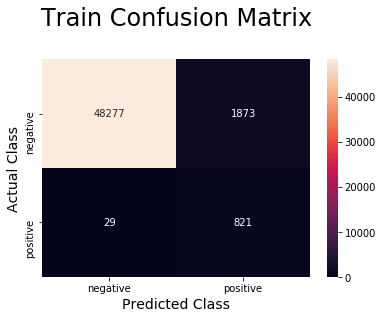

Train Cost:  33230
Test Cost:  13160


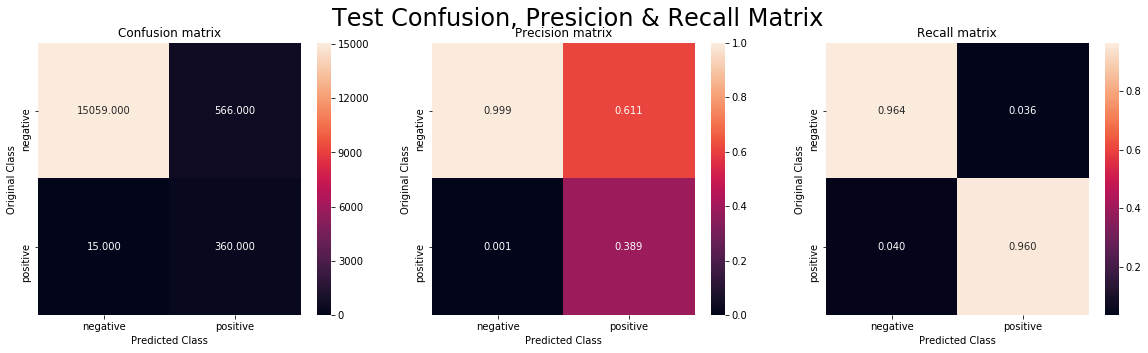

In [19]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

### 4.1.1.4. XGBoost

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.4s
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory le

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=30, min_child_weight=1, missing=None, n_estimators=40,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)


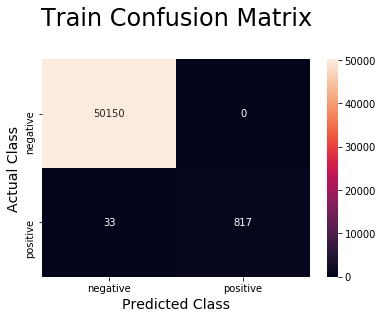

Train Cost:  16500
Test Cost:  53150


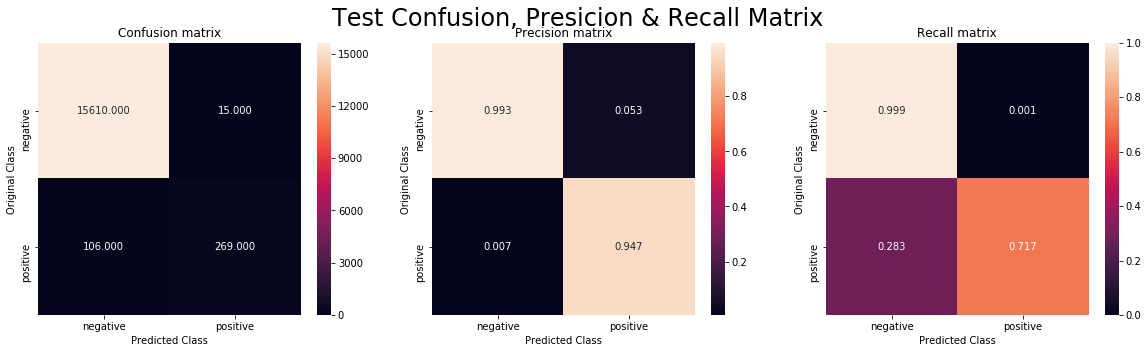

In [20]:
# tuned_parameters = {"max_depth": [1, 2, 3, 5, 8, 10, 20, 50, 100],
#               "n_estimators": [10, 20, 50, 100, 200, 300, 500, 800, 1000],
#                 'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
#               'colsample_bytree':[0.1,0.3,0.5,1],
#             'subsample':[0.1,0.3,0.5,1]}


tuned_parameters = {"n_estimators": [10, 20, 30, 40, 50],
                   "max_depth" : [2, 3, 5, 10, 15, 20, 25, 30],
                    'colsample_bytree':[0.1,0.3,0.5,1],
                   'subsample':[0.1,0.3,0.5,1]}


xgbc = xgb.XGBClassifier(n_jobs = -1, random_state=42)
clf = RandomizedSearchCV(xgbc, tuned_parameters, cv=cv, scoring='recall', n_jobs = -1, verbose=10)
clf.fit(X_train, y_train)


print(clf.best_estimator_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train), y_test, calib.predict(X_test))

100%|██████████| 1515/1515 [00:34<00:00, 43.73it/s]


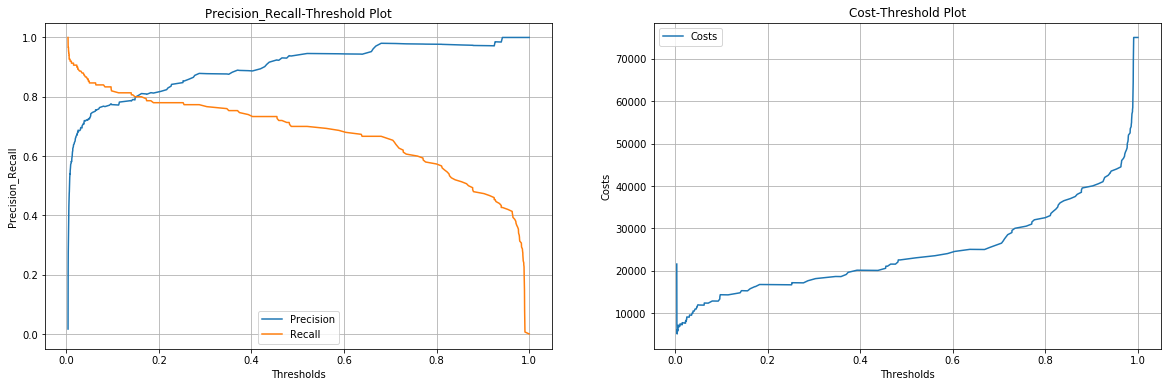

Best threshold: 0.0044
Min cost: 5110.00


In [21]:
threshold, cost = plot_precision_recall_costs(calib, X_cv, y_cv)

In [22]:
# threshold, cost = plot_precision_recall_costs(calib, X_test, y_test)

In [23]:
# threshold = 0.007

In [24]:
y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
metric.append(["Mean","XGBoost", train_cost, cost, test_cost])

Train Cost:  16980
Test Cost:  11690


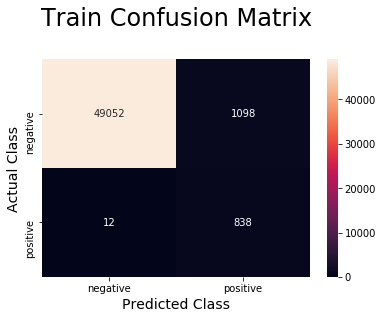

Train Cost:  16980
Test Cost:  11690


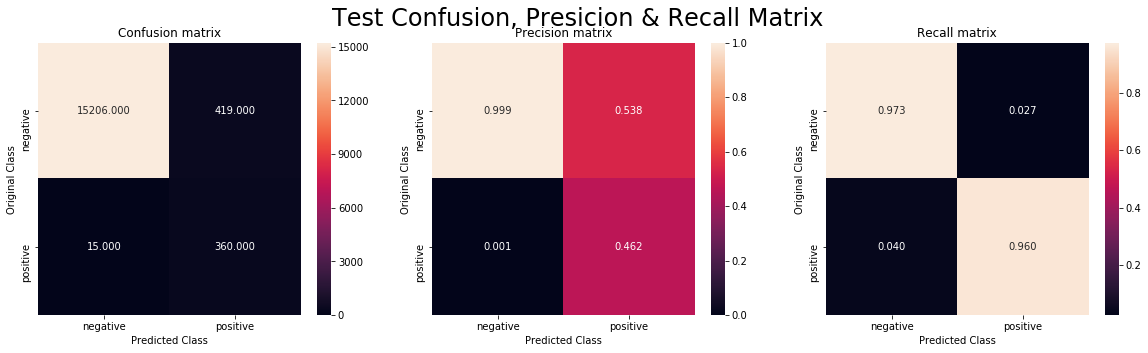

In [25]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

## 4.1.2. Median Impute

In [82]:
X_train = pd.read_csv('train_median.csv')
X_cv = pd.read_csv('cv_median.csv')
X_test = pd.read_csv('test_median.csv')

X_train_std = pd.read_csv('train_median_std.csv')
X_cv_std = pd.read_csv('cv_median_std.csv')
X_test_std = pd.read_csv('test_median_std.csv')

y_train = pd.read_csv('y_train.csv')['class']
y_cv = pd.read_csv('y_cv.csv')['class']
y_test = pd.read_csv('y_test.csv')['class']

In [27]:
y_train.value_counts()

0    50150
1      850
Name: class, dtype: int64

In [28]:
y_cv.value_counts()

0    8850
1     150
Name: class, dtype: int64

In [29]:
y_test.value_counts()

0    15625
1      375
Name: class, dtype: int64

### 4.1.2.1. Logistic Regression

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 15.6min
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed: 22.9min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 26.5min finished


LogisticRegression(C=1e-06, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 1e-06}


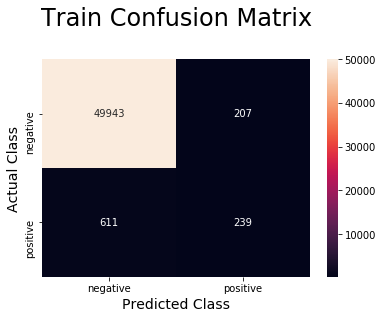

Train Cost:  307570
Test Cost:  129440


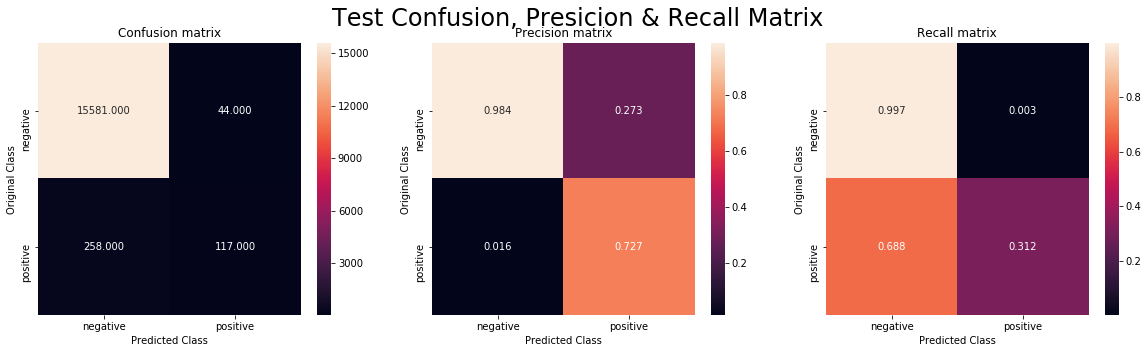

In [30]:
C = [math.pow(base,i) for i in range(-6,6)]
# H = [round(math.log(i,10)) for i in C]

tuned_parameters = [{'C': C}, {'penalty':['l1','l2']}, {'class_weight':[None,'balanced']}]

C = [round(math.log(i,base)) for i in C]
clf = GridSearchCV(LogisticRegression(), \
                   tuned_parameters, cv=cv, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(X_train_std, y_train)

# plot_grid_search(clf, X_train, y_train, C)
print(clf.best_estimator_)
print(clf.best_params_)
best_estimator = clf.best_estimator_



calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train_std, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train_std), y_test, calib.predict(X_test_std))

100%|██████████| 5451/5451 [02:06<00:00, 43.21it/s]


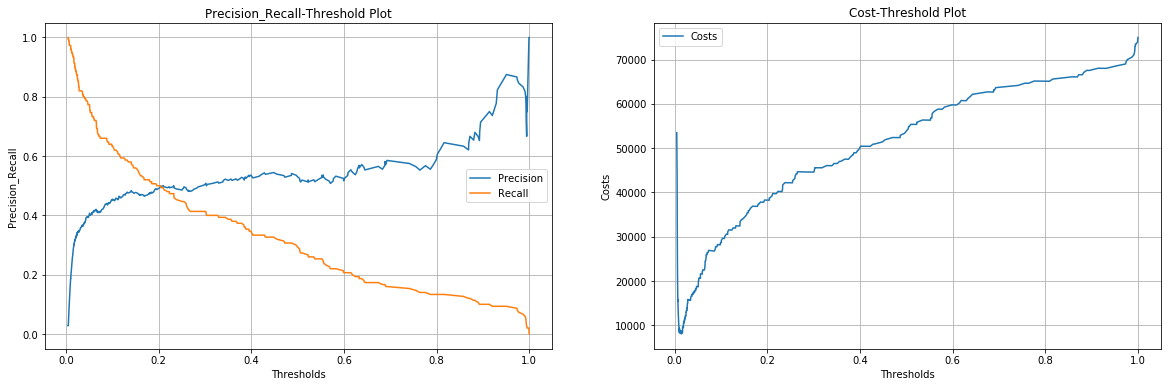

Best threshold: 0.0143
Min cost: 8040.00


In [31]:
# threshold, cost = plot_precision_recall_costs(calib, X_train[40000:], y_train[40000:])
threshold, cost = plot_precision_recall_costs(calib, X_cv_std, y_cv)

In [32]:
y_train_pred = calib.predict_proba(X_train_std)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test_std)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
metric.append(["Median","Logistic Reg.", train_cost, cost, test_cost])

Train Cost:  60880
Test Cost:  16530


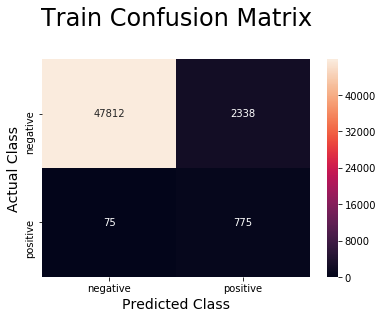

Train Cost:  60880
Test Cost:  16530


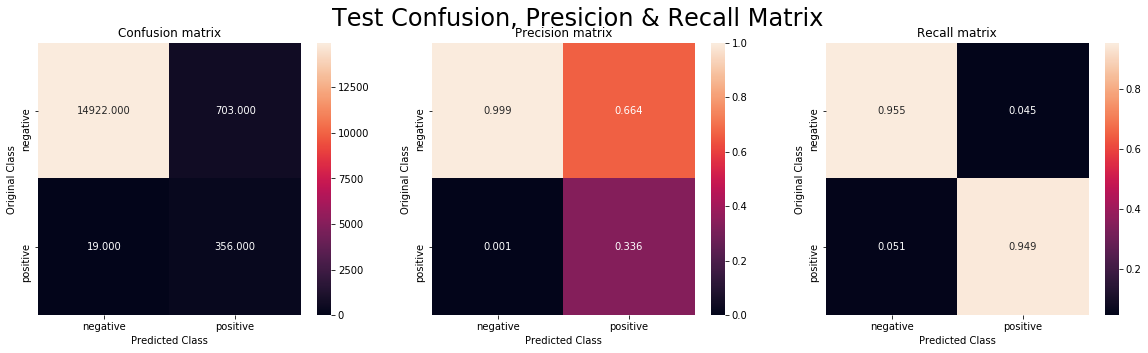

In [33]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

### 4.1.2.2. Support Vector Machine

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
{'class_weight': 'balanced'}


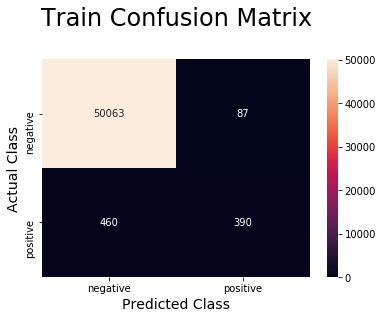

Train Cost:  230870
Test Cost:  98790


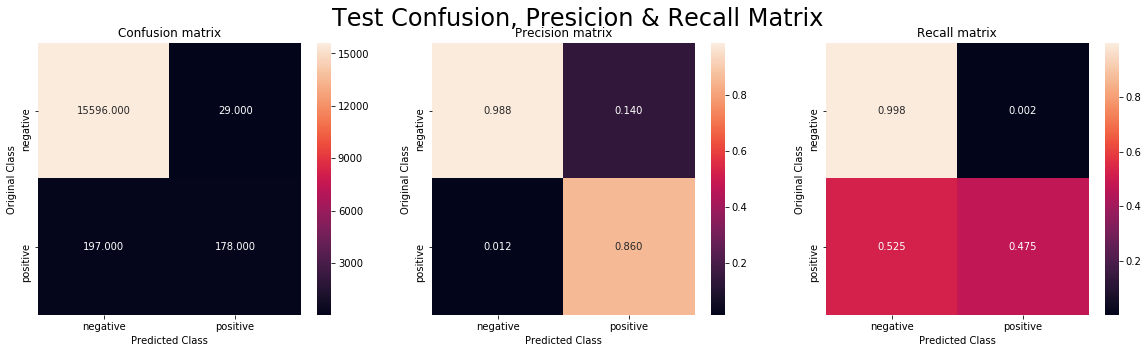

In [83]:
C = [math.pow(base,i) for i in range(-6,6)]
# H = [round(math.log(i,10)) for i in C]

tuned_parameters = [{'alpha': C}, {'penalty':['l1','l2']}, {'class_weight':[None,'balanced']}]


C = [round(math.log(i,base)) for i in C]
clf = GridSearchCV(SGDClassifier(loss="hinge",max_iter=1000, n_jobs=-1), \
                   tuned_parameters, cv=cv, scoring='recall', n_jobs=-1)
clf.fit(X_train_std, y_train)

# plot_grid_search(clf, X_train, y_train, C)
print(clf.best_estimator_)
print(clf.best_params_)
best_estimator = clf.best_estimator_



calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train_std, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train_std), y_test, calib.predict(X_test_std))

100%|██████████| 4911/4911 [01:53<00:00, 43.14it/s]


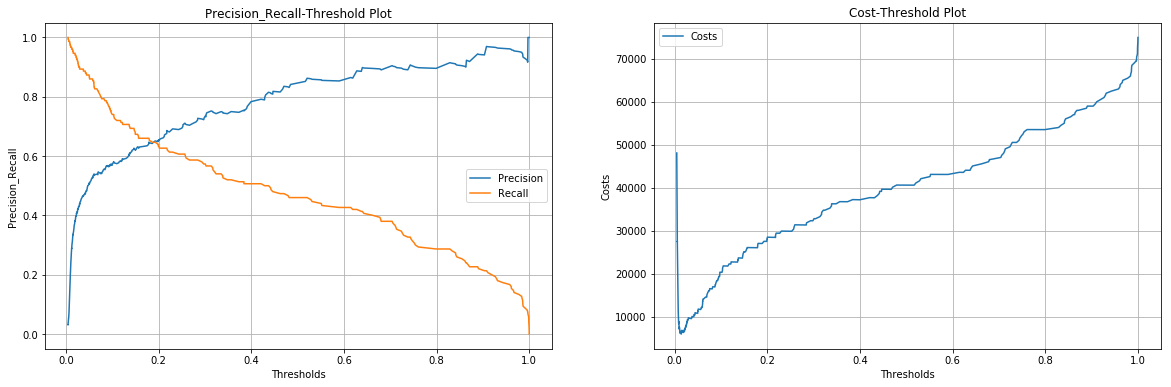

Best threshold: 0.0147
Min cost: 5950.00


In [84]:
# threshold, cost = plot_precision_recall_costs(calib, X_train[40000:], y_train[40000:])
threshold, cost = plot_precision_recall_costs(calib, X_cv_std, y_cv)

In [85]:
y_train_pred = calib.predict_proba(X_train_std)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test_std)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
metric.append(["Median","Lr. SVM", train_cost, cost, test_cost])

Train Cost:  35120
Test Cost:  12130


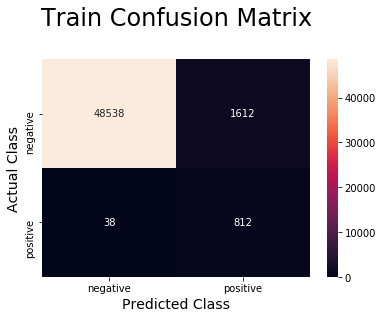

Train Cost:  35120
Test Cost:  12130


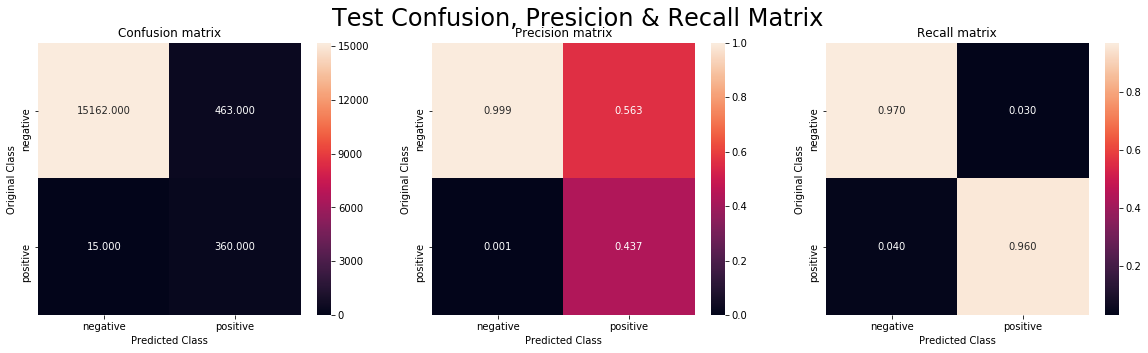

In [90]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

### 4.1.2.3. Random Forest

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.4s
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/j

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


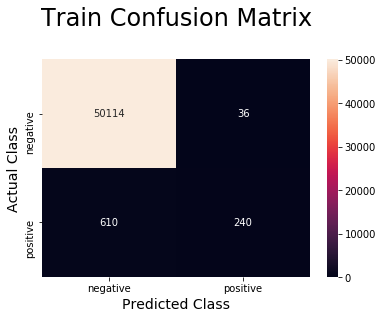

Train Cost:  305360
Test Cost:  145640


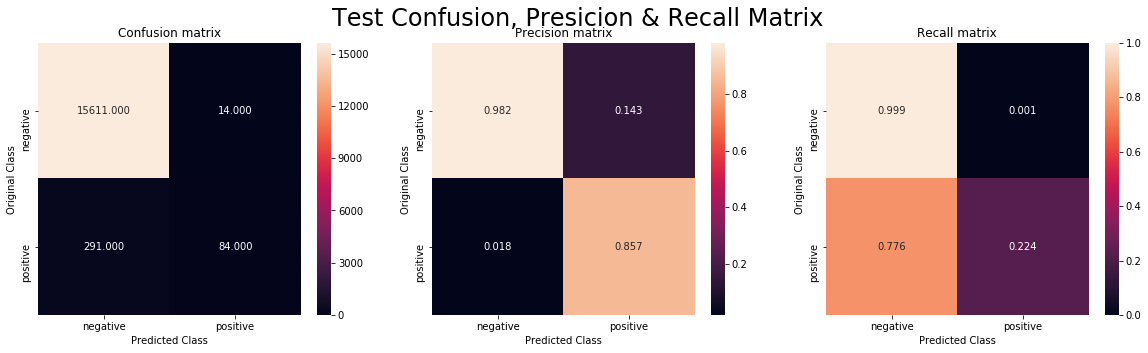

In [38]:
tuned_parameters = {"max_depth": [2, 3, 5, 8, 10, 15, 20, 25, 30, 40, 50],
              "n_estimators": [10, 20, 30, 40, 50, 80, 100, 150, 200],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
                "max_features": ['auto', 'sqrt'],
                "class_weight": ['balanced', 'balanced_subsample', None]
             }
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rf, tuned_parameters, cv=cv, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(X_train, y_train)


print(clf.best_estimator_)

best_estimator = clf.best_estimator_


calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train), y_test, calib.predict(X_test))

100%|██████████| 3745/3745 [01:26<00:00, 44.06it/s]


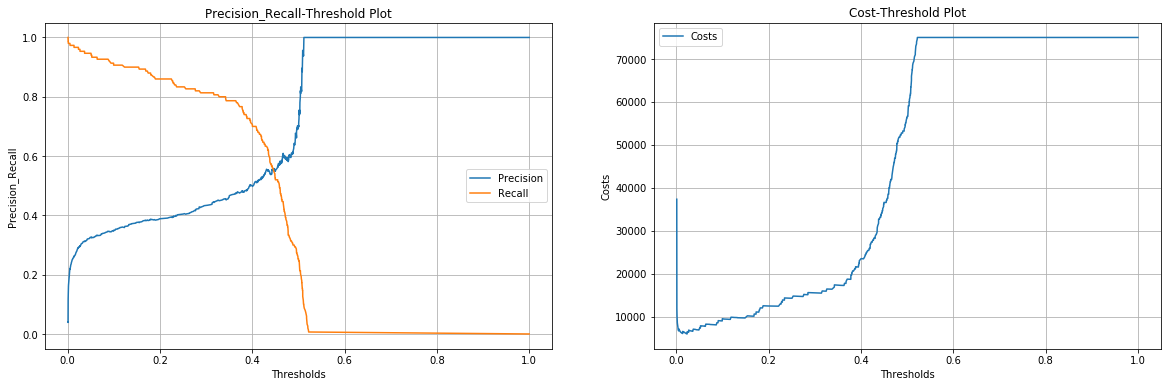

Best threshold: 0.0230
Min cost: 6010.00


In [39]:
# threshold, cost = plot_precision_recall_costs(calib, X_train, y_train)
threshold, cost = plot_precision_recall_costs(calib, X_cv, y_cv)

In [40]:
y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
metric.append(["Median","Random Forest", train_cost, cost, test_cost])

Train Cost:  33600
Test Cost:  12540


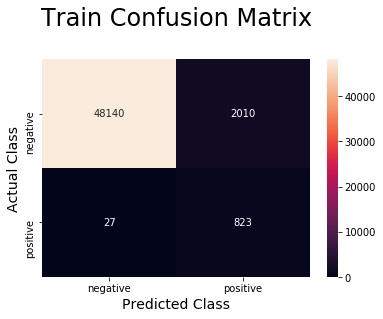

Train Cost:  33600
Test Cost:  12540


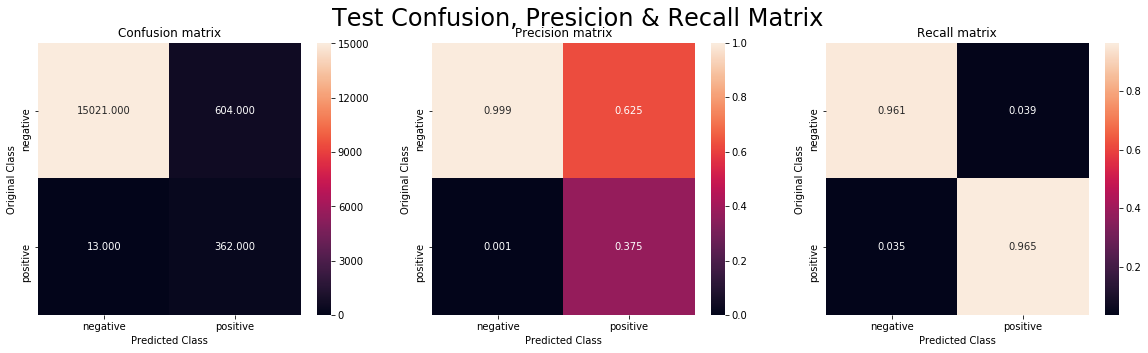

In [41]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

### 4.1.2.4. XGBoost

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.6s
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   51.0s
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.3, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=15, min_child_weight=1, missing=None,
              n_estimators=30, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1)


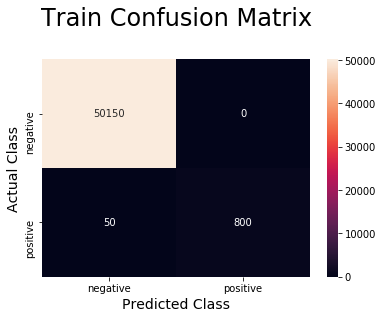

Train Cost:  25000
Test Cost:  52680


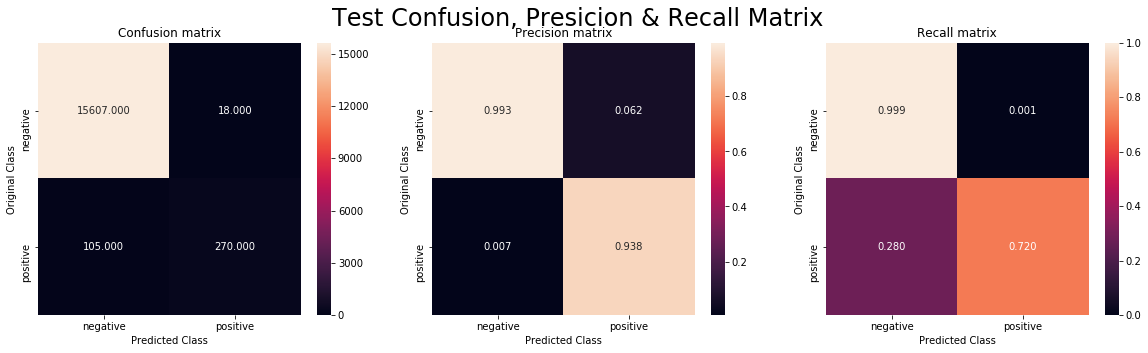

In [42]:
# tuned_parameters = {"max_depth": [1, 2, 3, 5, 8, 10, 20, 50, 100],
#               "n_estimators": [10, 20, 50, 100, 200, 300, 500, 800, 1000],
#                 'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
#               'colsample_bytree':[0.1,0.3,0.5,1],
#             'subsample':[0.1,0.3,0.5,1]}


# tuned_parameters = {"n_estimators": [10, 20, 30, 40, 50, 100],
tuned_parameters = {"n_estimators": [10, 20, 30, 40, 50],
                   "max_depth" : [2, 3, 5, 10, 15, 20, 25, 30],
                    'colsample_bytree':[0.1,0.3,0.5,1],
                   'subsample':[0.1,0.3,0.5,1]}


xgbc = xgb.XGBClassifier(n_jobs = -1, random_state=42)
clf = RandomizedSearchCV(xgbc, tuned_parameters, cv=cv, scoring='recall', n_jobs = -1, verbose=10)
clf.fit(X_train, y_train)


print(clf.best_estimator_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train), y_test, calib.predict(X_test))

100%|██████████| 1562/1562 [00:34<00:00, 44.72it/s]


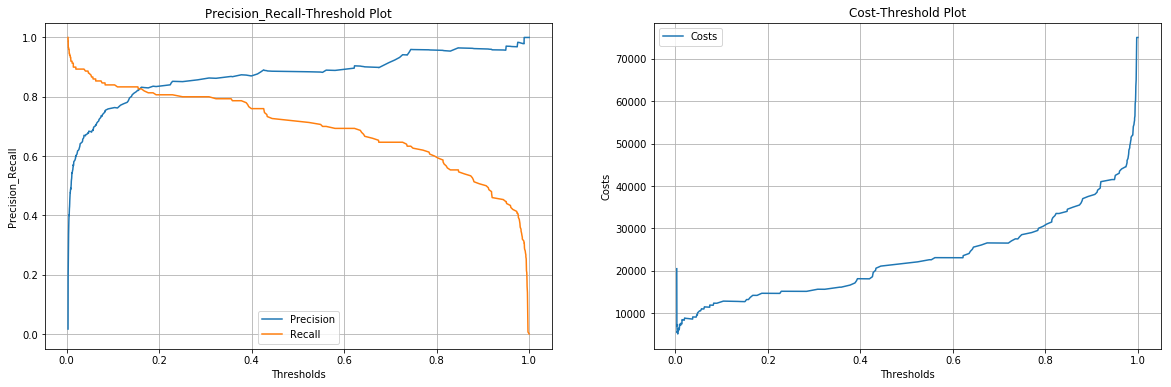

Best threshold: 0.0054
Min cost: 5150.00


In [43]:
# threshold, cost = plot_precision_recall_costs(calib, X_train, y_train)
threshold, cost = plot_precision_recall_costs(calib, X_cv, y_cv)

In [46]:
y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
metric.append(["Median","XGBoost", train_cost, cost, test_cost])

Train Cost:  15570
Test Cost:  11140


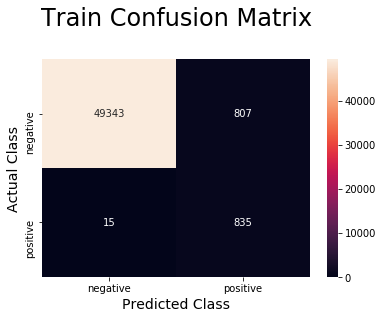

Train Cost:  15570
Test Cost:  11140


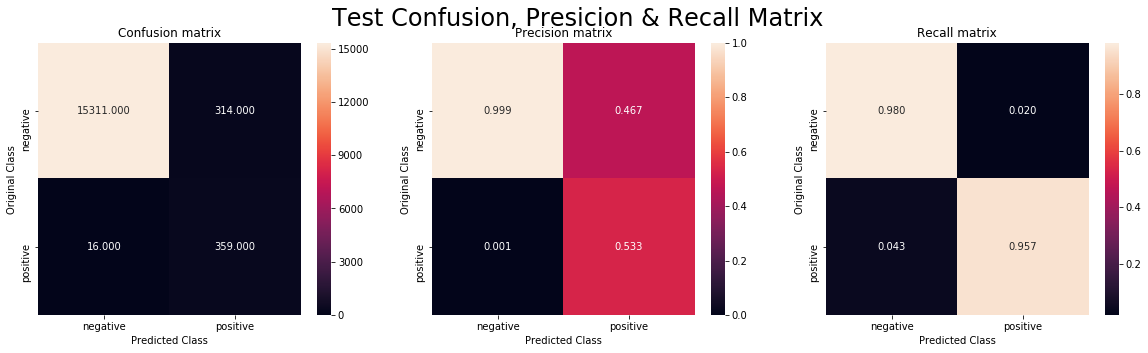

In [47]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

## 4.1.3. Mode Impute

In [91]:
X_train = pd.read_csv('train_mode.csv')
X_cv = pd.read_csv('cv_mode.csv')
X_test = pd.read_csv('test_mode.csv')

X_train_std = pd.read_csv('train_mode_std.csv')
X_cv_std = pd.read_csv('cv_mode_std.csv')
X_test_std = pd.read_csv('test_mode_std.csv')

y_train = pd.read_csv('y_train.csv')['class']
y_cv = pd.read_csv('y_cv.csv')['class']
y_test = pd.read_csv('y_test.csv')['class']

In [49]:
y_train.value_counts()

0    50150
1      850
Name: class, dtype: int64

In [50]:
y_cv.value_counts()

0    8850
1     150
Name: class, dtype: int64

In [51]:
y_test.value_counts()

0    15625
1      375
Name: class, dtype: int64

### 4.1.3.1. Logistic Regression

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed: 21.3min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 25.1min finished


LogisticRegression(C=1e-06, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 1e-06}


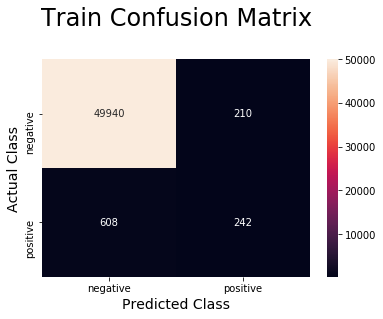

Train Cost:  306100
Test Cost:  128940


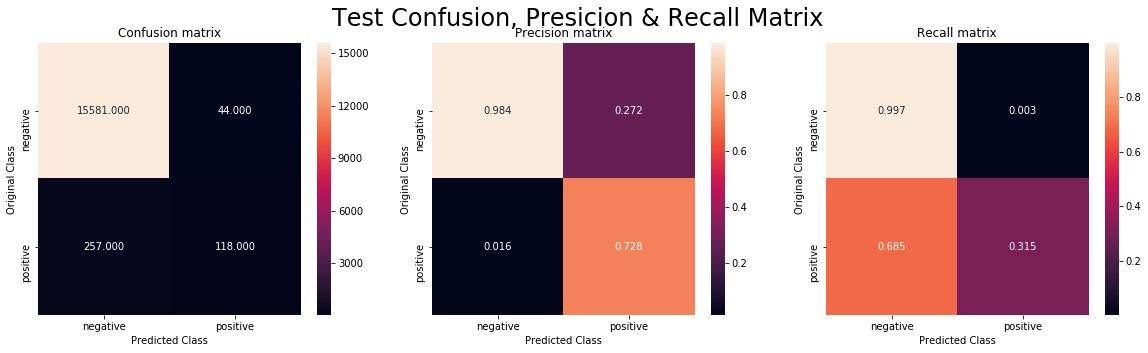

In [52]:

C = [math.pow(base,i) for i in range(-6,6)]
# H = [round(math.log(i,10)) for i in C]

tuned_parameters = [{'C': C}, {'penalty':['l1','l2']}, {'class_weight':[None,'balanced']}]

C = [round(math.log(i,base)) for i in C]
clf = GridSearchCV(LogisticRegression(), \
                   tuned_parameters, cv=cv, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(X_train_std, y_train)

# plot_grid_search(clf, X_train, y_train, C)
print(clf.best_estimator_)
print(clf.best_params_)
best_estimator = clf.best_estimator_



calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train_std, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train_std), y_test, calib.predict(X_test_std))

100%|██████████| 5439/5439 [02:05<00:00, 43.23it/s]


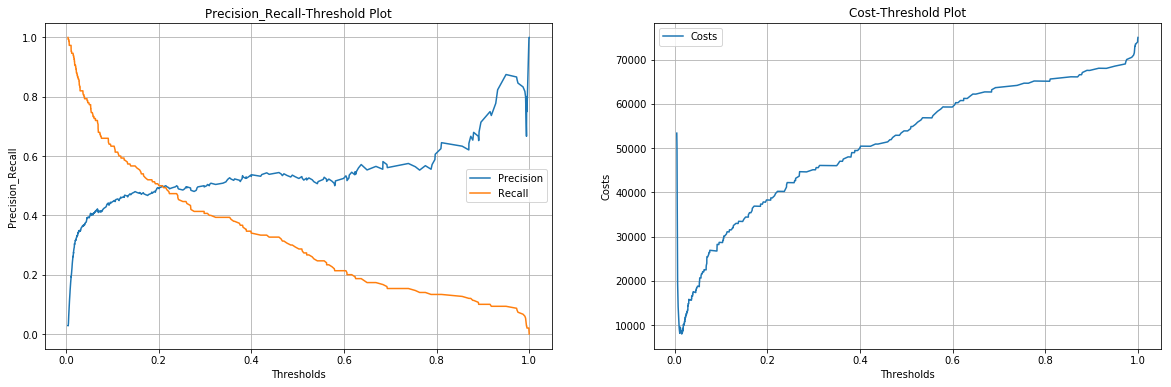

Best threshold: 0.0154
Min cost: 8000.00


In [53]:
# threshold, cost = plot_precision_recall_costs(calib, X_train[40000:], y_train[40000:])
threshold, cost = plot_precision_recall_costs(calib, X_cv_std, y_cv)

In [54]:
y_train_pred = calib.predict_proba(X_train_std)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test_std)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
metric.append(["Mode","Logistic Reg.", train_cost, cost, test_cost])

Train Cost:  61140
Test Cost:  16450


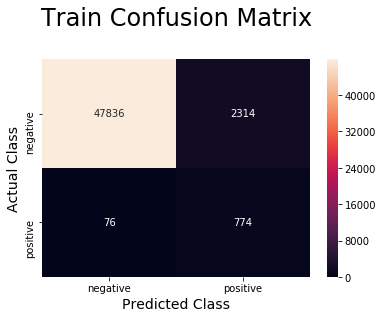

Train Cost:  61140
Test Cost:  16450


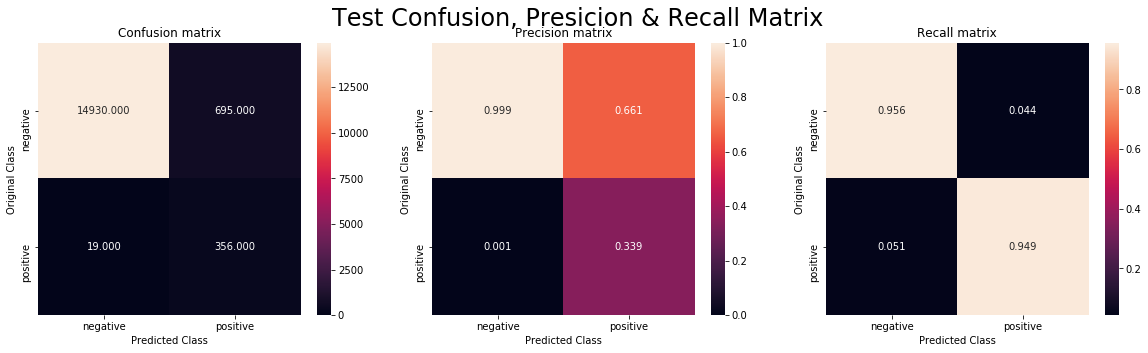

In [55]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

### 4.1.3.2. Support Vector Machine

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
{'class_weight': 'balanced'}


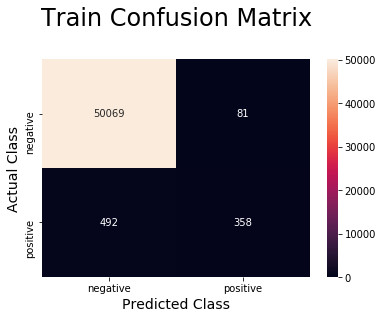

Train Cost:  246810
Test Cost:  102750


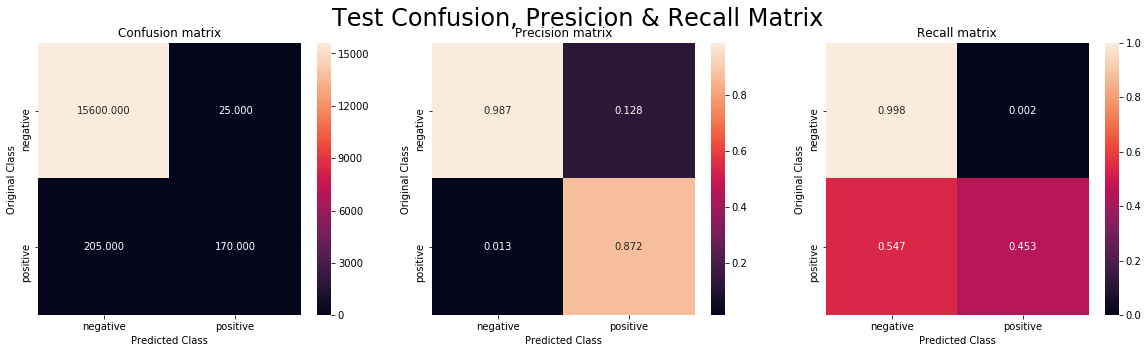

In [95]:
C = [math.pow(base,i) for i in range(-6,6)]
# H = [round(math.log(i,10)) for i in C]

tuned_parameters = [{'alpha': C}, {'penalty':['l1','l2']}, {'class_weight':[None,'balanced']}]


C = [round(math.log(i,base)) for i in C]
clf = GridSearchCV(SGDClassifier(loss="hinge",max_iter=1000, n_jobs=-1), \
                   tuned_parameters, cv=cv, scoring='recall', n_jobs=-1)
clf.fit(X_train_std, y_train)

# plot_grid_search(clf, X_train, y_train, C)
print(clf.best_estimator_)
print(clf.best_params_)
best_estimator = clf.best_estimator_



calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train_std, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train_std), y_test, calib.predict(X_test_std))

100%|██████████| 5403/5403 [02:03<00:00, 43.64it/s]


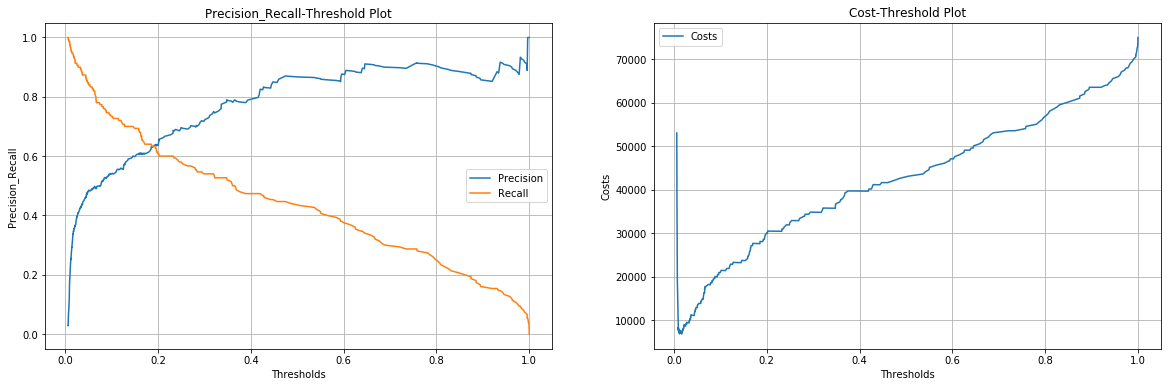

Best threshold: 0.0167
Min cost: 6790.00


In [96]:
# threshold, cost = plot_precision_recall_costs(calib, X_train[40000:], y_train[40000:])
threshold, cost = plot_precision_recall_costs(calib, X_cv_std, y_cv)

In [97]:
y_train_pred = calib.predict_proba(X_train_std)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test_std)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
# metric.append(["Mode","Lr. SVM", train_cost, cost, test_cost])

Train Cost:  43090
Test Cost:  13990


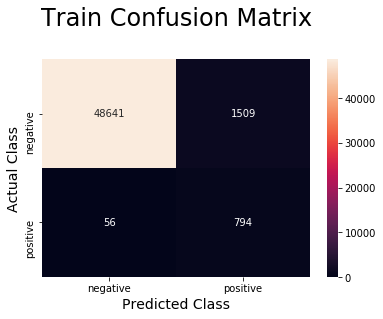

Train Cost:  43090
Test Cost:  13990


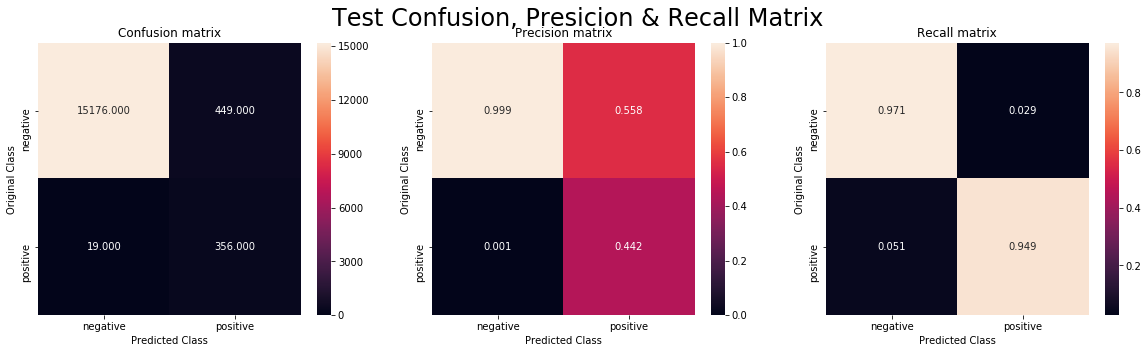

In [100]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

### 4.1.3.3. Random Forest

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   58.0s
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Paral

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=8,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


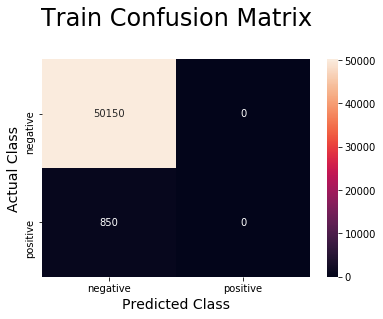

Train Cost:  425000
Test Cost:  187500


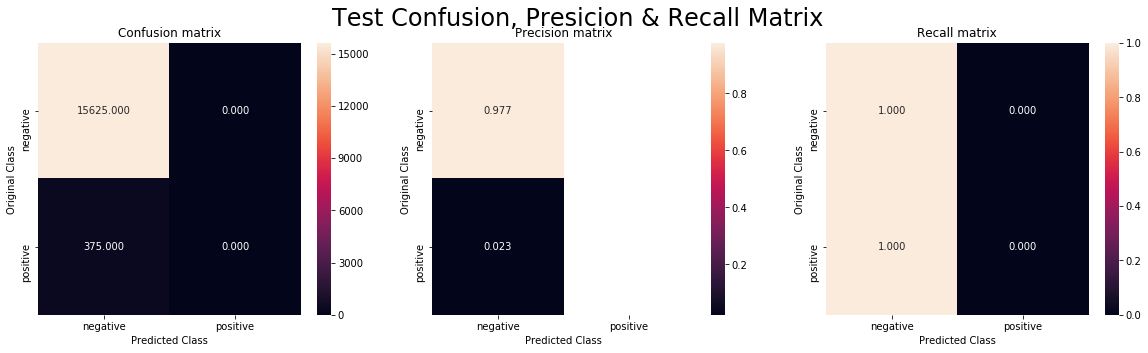

In [60]:
tuned_parameters = {"max_depth": [2, 3, 5, 8, 10, 15, 20, 25, 30, 40, 50],
              "n_estimators": [10, 20, 30, 40, 50, 80, 100, 150, 200],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
                "max_features": ['auto', 'sqrt'],
                "class_weight": ['balanced', 'balanced_subsample', None]
             }
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rf, tuned_parameters, cv=cv, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(X_train, y_train)


print(clf.best_estimator_)

best_estimator = clf.best_estimator_


calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train), y_test, calib.predict(X_test))

100%|██████████| 1998/1998 [00:45<00:00, 43.63it/s]


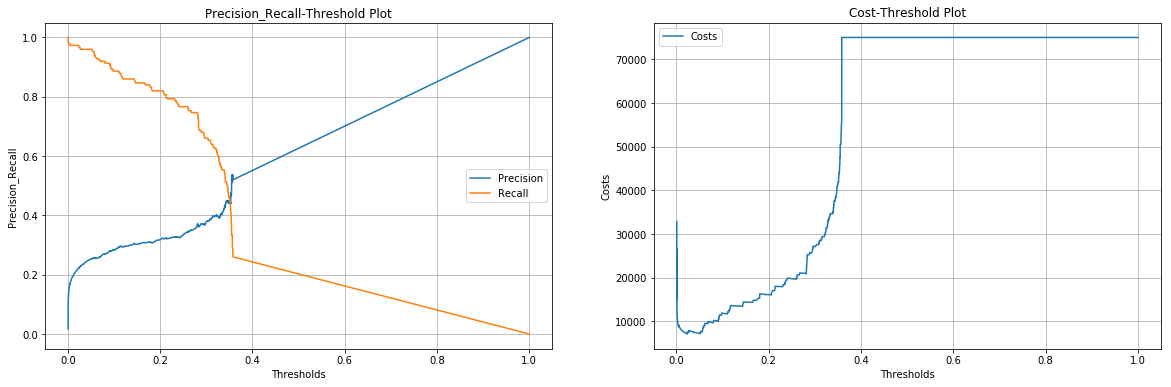

Best threshold: 0.0233
Min cost: 7110.00


In [61]:
# threshold, cost = plot_precision_recall_costs(calib, X_train, y_train)
threshold, cost = plot_precision_recall_costs(calib, X_cv, y_cv)

In [62]:
y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
metric.append(["Mode","Random Forest", train_cost, cost, test_cost])

Train Cost:  57020
Test Cost:  15220


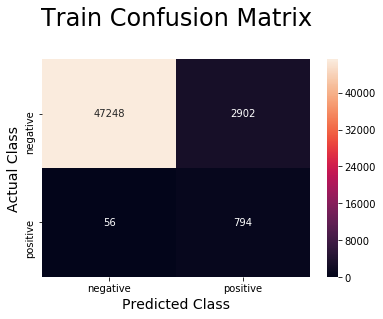

Train Cost:  57020
Test Cost:  15220


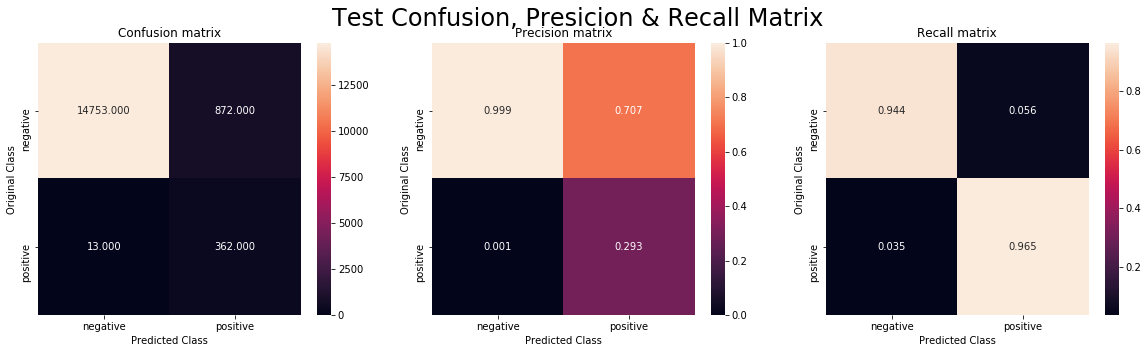

In [63]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

### 4.1.3.4. XGBoost

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.8s
/home/desubhan123_gmail_com/miniconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  1.3min remaining:   17.7s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  1.4min remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.5, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=25, min_child_weight=1, missing=None,
              n_estimators=30, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.5)


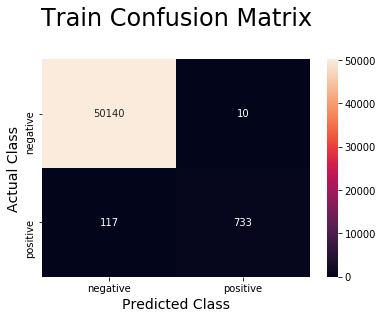

Train Cost:  58600
Test Cost:  54180


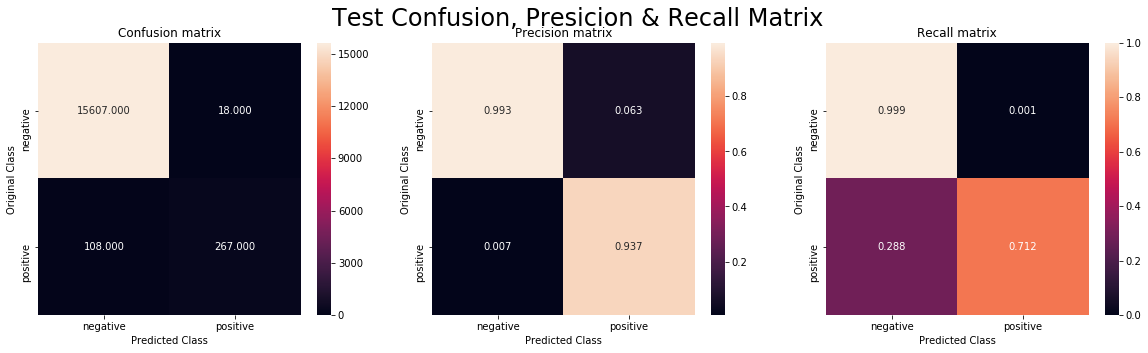

In [64]:
# tuned_parameters = {"max_depth": [1, 2, 3, 5, 8, 10, 20, 50, 100],
#               "n_estimators": [10, 20, 50, 100, 200, 300, 500, 800, 1000],
#                 'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
#               'colsample_bytree':[0.1,0.3,0.5,1],
#             'subsample':[0.1,0.3,0.5,1]}


tuned_parameters = {"n_estimators": [10, 20, 30, 40, 50],
                   "max_depth" : [2, 3, 5, 10, 15, 20, 25, 30],
                    'colsample_bytree':[0.1,0.3,0.5,1],
                   'subsample':[0.1,0.3,0.5,1]}


xgbc = xgb.XGBClassifier(n_jobs = -1, random_state=42)
clf = RandomizedSearchCV(xgbc, tuned_parameters, cv=cv, scoring='recall', n_jobs = -1, verbose=10)
clf.fit(X_train, y_train)


print(clf.best_estimator_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train), y_test, calib.predict(X_test))

100%|██████████| 1511/1511 [00:33<00:00, 44.45it/s]


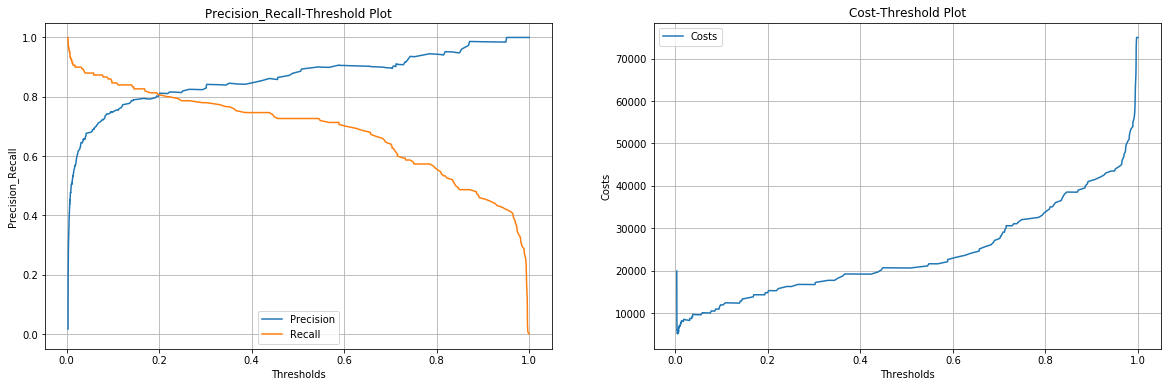

Best threshold: 0.0049
Min cost: 5060.00


In [65]:
# threshold, cost = plot_precision_recall_costs(calib, X_train, y_train)
threshold, cost = plot_precision_recall_costs(calib, X_cv, y_cv)

In [68]:
y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
metric.append(["Mode","XGBoost", train_cost, cost, test_cost])

Train Cost:  22160
Test Cost:  11150


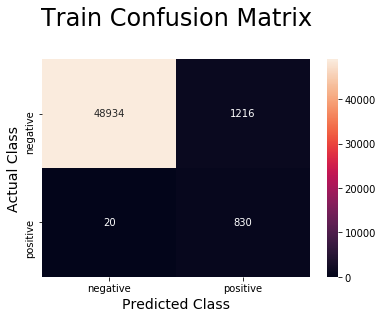

Train Cost:  22160
Test Cost:  11150


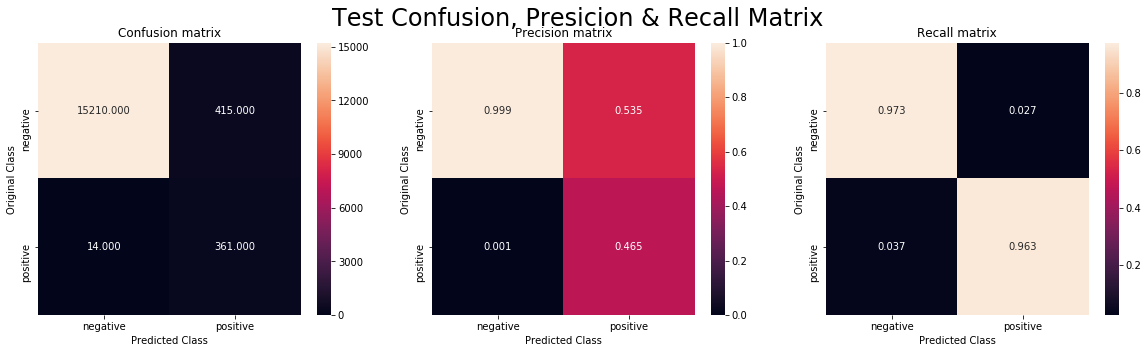

In [69]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

In [32]:
pickle.dump(metric, open("metric1.pkl","wb"))

# 4.2. Oversampled data using SMOTE

In [3]:
metric = []
cv = 10

## 4.2.1. Mean Impute

In [4]:
X_train = pd.read_csv('train_mean.csv')
X_cv = pd.read_csv('cv_mean.csv')
X_test = pd.read_csv('test_mean.csv')


y_train = pd.read_csv('y_train.csv')['class']
y_cv = pd.read_csv('y_cv.csv')['class']
y_test = pd.read_csv('y_test.csv')['class']

In [5]:
X_train, y_train = SMOTE_oversmapling(X_train, y_train)

(100300, 170) (100300,)
[50150 50150]


### 4.2.1.1. Random Forest

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed: 18.7min remaining:   46.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.8min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=25, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=80, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


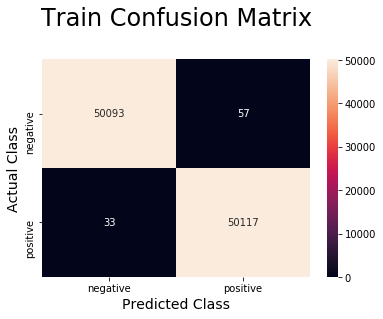

Train Cost:  17070
Test Cost:  35700


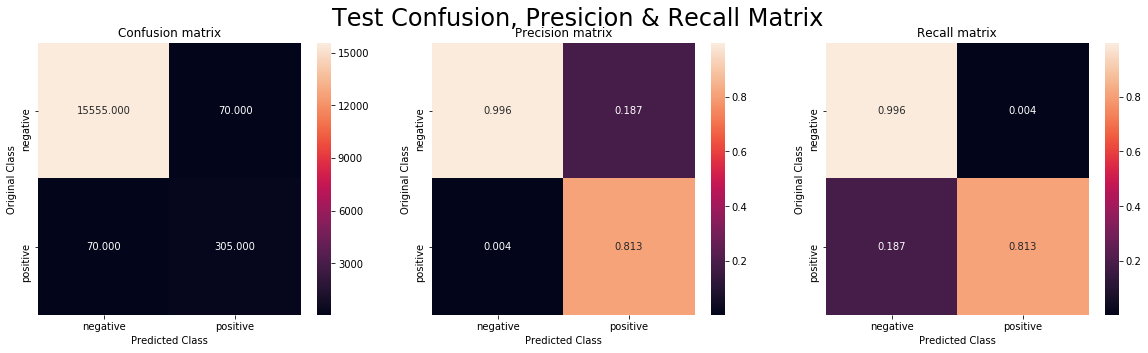

In [6]:
tuned_parameters = {"max_depth": [2, 3, 5, 8, 10, 15, 20, 25, 30, 40, 50],
              "n_estimators": [10, 20, 30, 35, 40, 50, 80, 100, 150, 200],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
                "max_features": ['auto', 'sqrt', 'log2'],
                "class_weight": ['balanced', 'balanced_subsample', None]
             }
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rf, tuned_parameters, cv=cv, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(X_train, y_train)


print(clf.best_estimator_)

best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train), y_test, calib.predict(X_test))

100%|██████████| 1090/1090 [00:24<00:00, 45.48it/s]


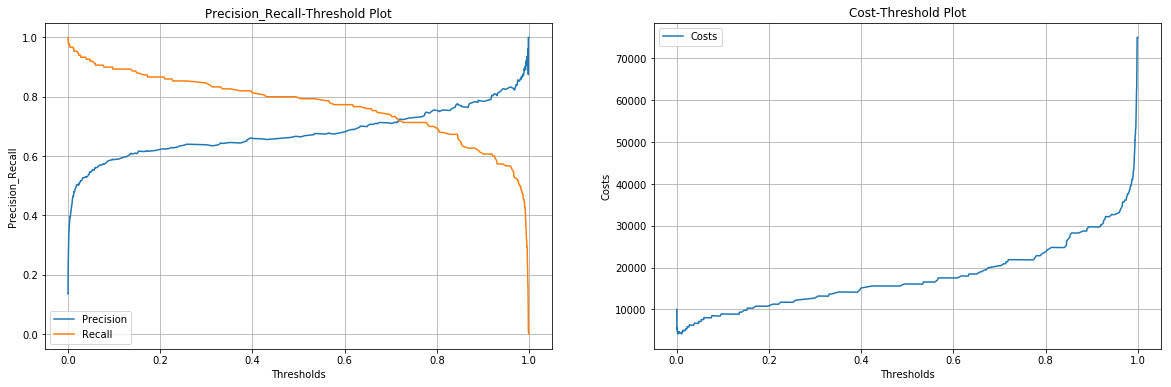

Best threshold: 0.0024
Min cost: 4150.00
Train Cost:  9760
Test Cost:  10300


In [7]:
threshold, cost = plot_precision_recall_costs(calib, X_cv, y_cv)

y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)

In [8]:
metric.append(["Mean","Random Forest", train_cost, cost, test_cost])

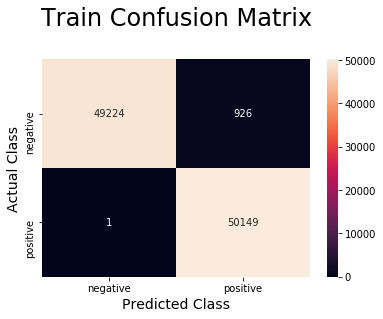

Train Cost:  9760
Test Cost:  10300


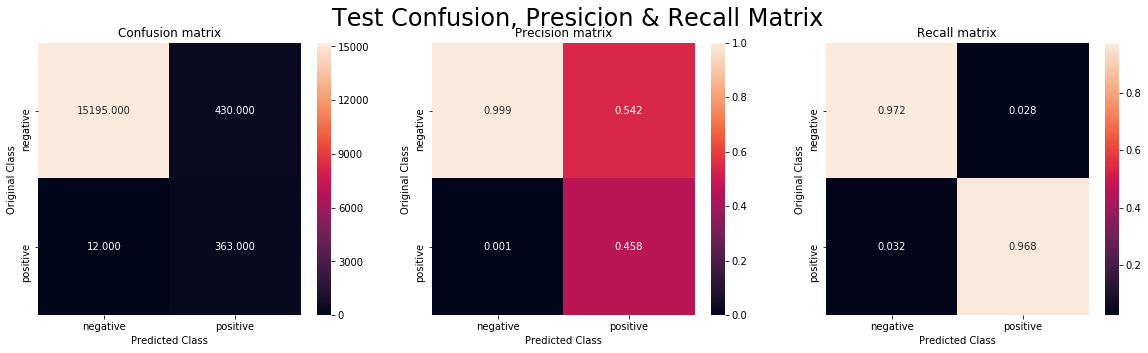

In [10]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

### 4.2.1.2. XGBoost

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed: 21.8min remaining:   54.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 23.5min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.5, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=25, min_child_weight=1, missing=None,
              n_estimators=50, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.5)


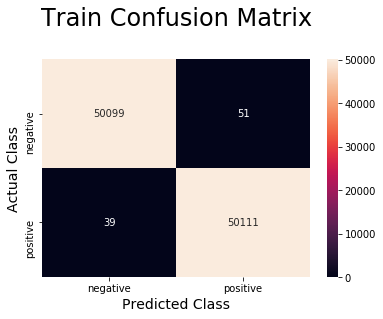

Train Cost:  20010
Test Cost:  28850


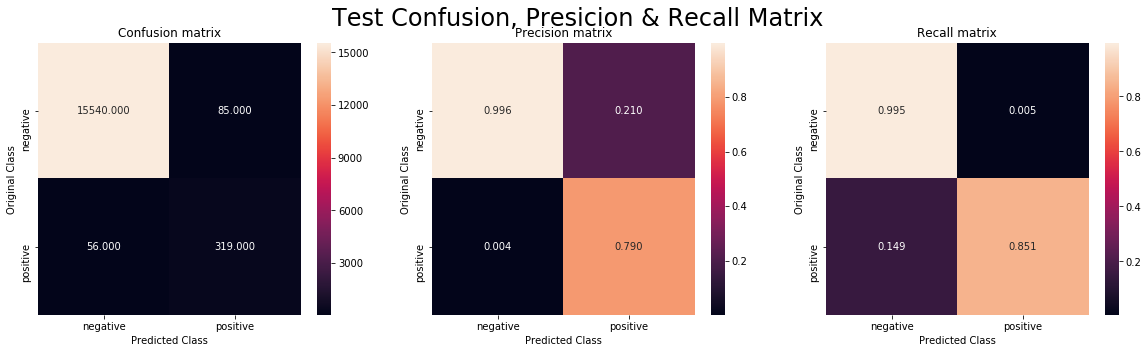

In [11]:
tuned_parameters = {"n_estimators": [10, 20, 30, 35, 40, 50],
                   "max_depth" : [2, 3, 5, 10, 15, 20, 25, 30],
                    'colsample_bytree':[0.1,0.3,0.5,1],
                   'subsample':[0.1,0.3,0.5,1]}


xgbc = xgb.XGBClassifier(n_jobs = -1, random_state=42)
clf = RandomizedSearchCV(xgbc, tuned_parameters, cv=cv, scoring='recall', n_jobs = -1, verbose=10)
clf.fit(X_train, y_train)


print(clf.best_estimator_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train), y_test, calib.predict(X_test))

In [20]:
best_estimator = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.5, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=25, min_child_weight=1, missing=None,
              n_estimators=30, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.5)

calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bytree=0.5,
                                                    gamma=0, learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=25,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=30, n_jobs=-1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_state=42,
                                                    reg_alpha=0, 

100%|██████████| 968/968 [00:21<00:00, 45.26it/s]


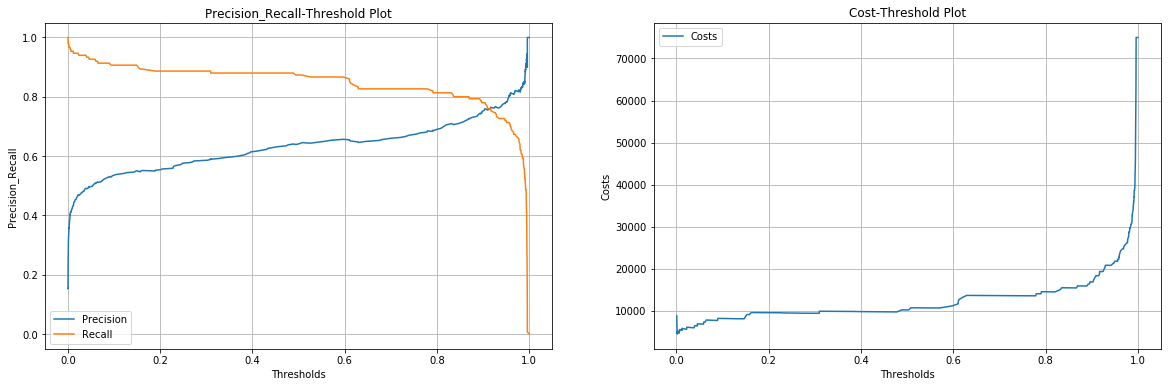

Best threshold: 0.0017
Min cost: 4500.00
Train Cost:  15660
Test Cost:  9310


In [21]:
threshold, cost = plot_precision_recall_costs(calib, X_cv, y_cv)

y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)

In [22]:
metric.append(["Mean","XGBoost", train_cost, cost, test_cost])

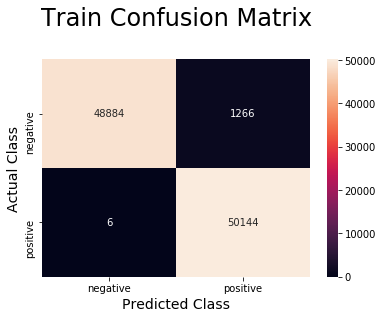

Train Cost:  15660
Test Cost:  9310


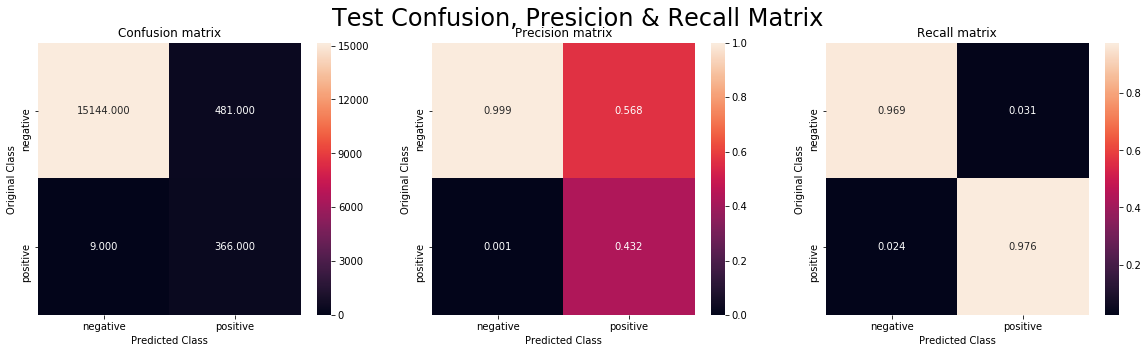

In [23]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

## 4.2.2. Median Impute

In [6]:
X_train = pd.read_csv('train_median.csv')
X_cv = pd.read_csv('cv_median.csv')
X_test = pd.read_csv('test_median.csv')


y_train = pd.read_csv('y_train.csv')['class']
y_cv = pd.read_csv('y_cv.csv')['class']
y_test = pd.read_csv('y_test.csv')['class']

In [7]:
X_train, y_train = SMOTE_oversmapling(X_train, y_train)

(100300, 170) (100300,)
[50150 50150]


In [8]:
X_train = pickle.load(open("111.pkl","rb"))
y_train = pickle.load(open("222.pkl","rb"))

In [9]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

### 4.2.2.1. Random Forest

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed: 19.3min remaining:   48.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 19.7min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


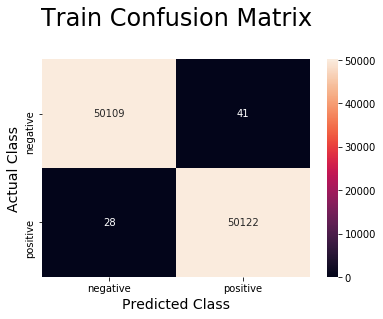

Train Cost:  14410
Test Cost:  34700


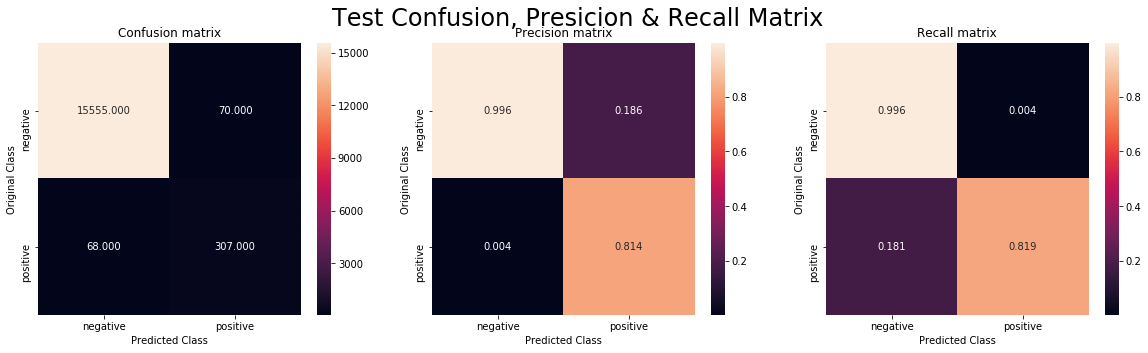

In [12]:
tuned_parameters = {"max_depth": [2, 3, 5, 8, 10, 15, 20, 25, 30, 40, 50],
              "n_estimators": [10, 20, 30, 40, 50, 80, 100, 150, 200],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
                "max_features": ['auto', 'sqrt', 'log2'],
                "class_weight": ['balanced', 'balanced_subsample', None]
             }
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rf, tuned_parameters, cv=cv, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(X_train, y_train)


print(clf.best_estimator_)

best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train), y_test, calib.predict(X_test))

100%|██████████| 1170/1170 [00:26<00:00, 43.72it/s]


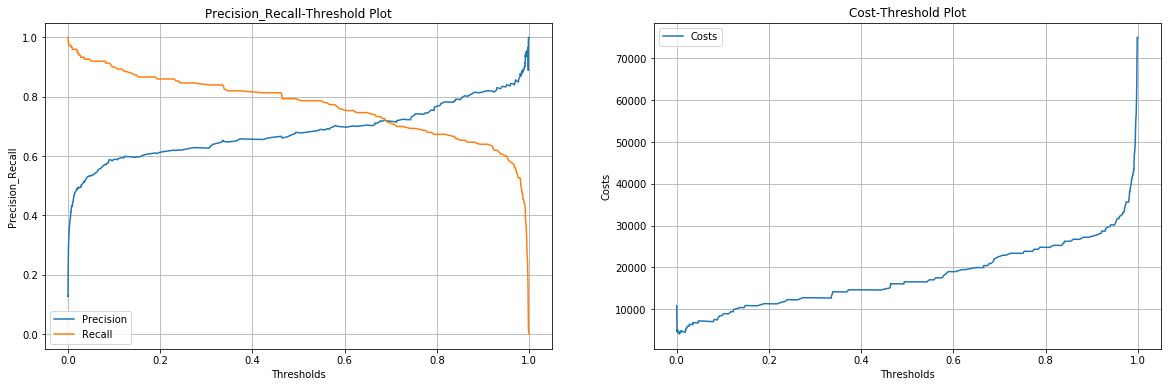

Best threshold: 0.0063
Min cost: 4080.00
Train Cost:  7600
Test Cost:  11690


In [13]:
threshold, cost = plot_precision_recall_costs(calib, X_cv, y_cv)

y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)

In [14]:
metric.append(["Median","Random Forest", train_cost, cost, test_cost])

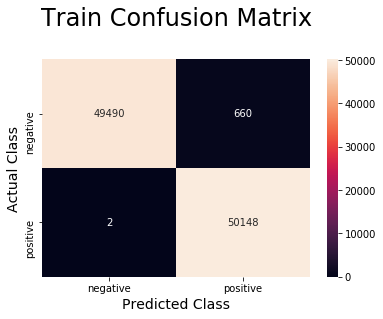

Train Cost:  7600
Test Cost:  11690


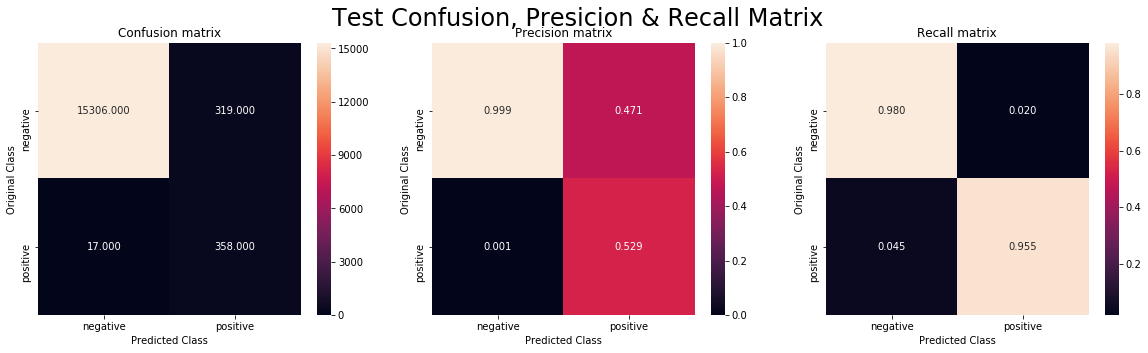

In [15]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

### 4.2.2.2. XGBoost

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed: 11.8min remaining:   29.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 12.3min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.3, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=30, min_child_weight=1, missing=None,
              n_estimators=25, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1)


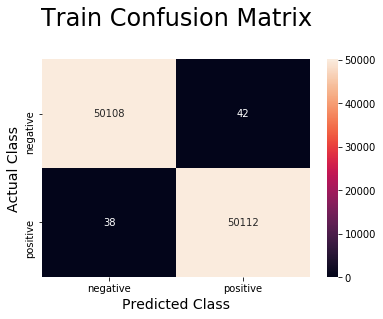

Train Cost:  19420
Test Cost:  27860


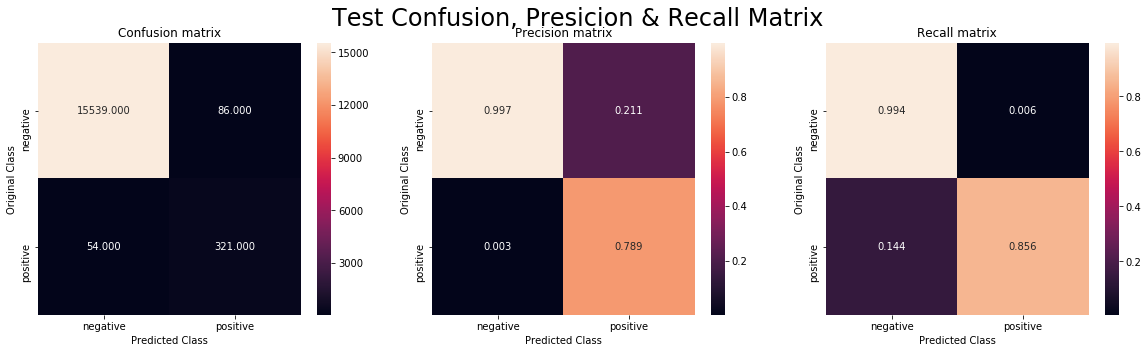

In [16]:
tuned_parameters = {"n_estimators": [10, 20, 25, 30, 35],
                   "max_depth" : [2, 3, 5, 10, 15, 20, 25, 30],
                    'colsample_bytree':[0.1,0.3,0.5,1],
                   'subsample':[0.1,0.3,0.5,1]}


xgbc = xgb.XGBClassifier(n_jobs = -1, random_state=42)
clf = RandomizedSearchCV(xgbc, tuned_parameters, cv=cv, scoring='recall', n_jobs = -1, verbose=10)
clf.fit(X_train, y_train)


print(clf.best_estimator_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train), y_test, calib.predict(X_test))

100%|██████████| 1175/1175 [00:27<00:00, 43.33it/s]


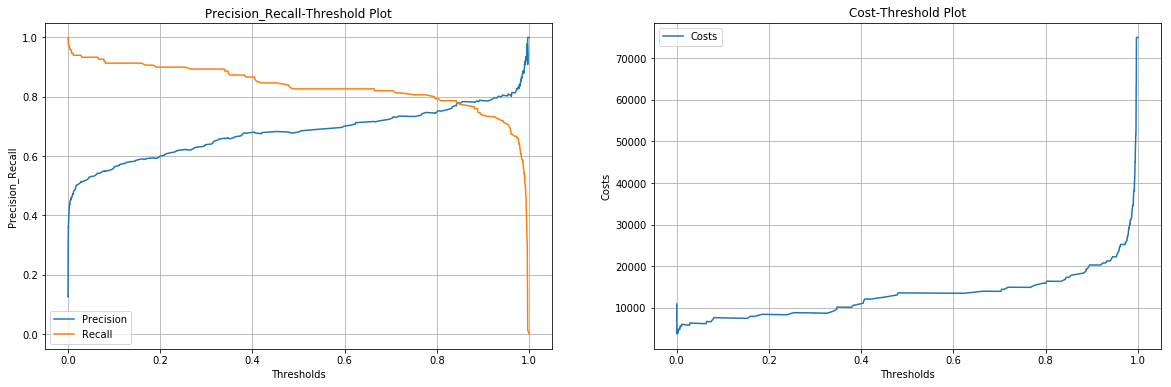

Best threshold: 0.0007
Min cost: 3700.00
Train Cost:  13740
Test Cost:  8660


In [17]:
threshold, cost = plot_precision_recall_costs(calib, X_cv, y_cv)

y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)

In [18]:
metric.append(["Median","XGBoost", train_cost, cost, test_cost])

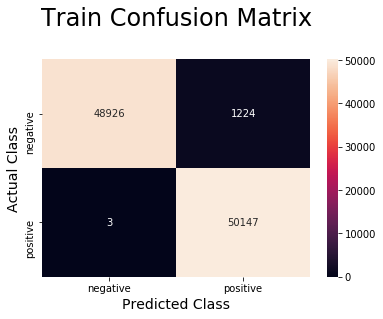

Train Cost:  13740
Test Cost:  8660


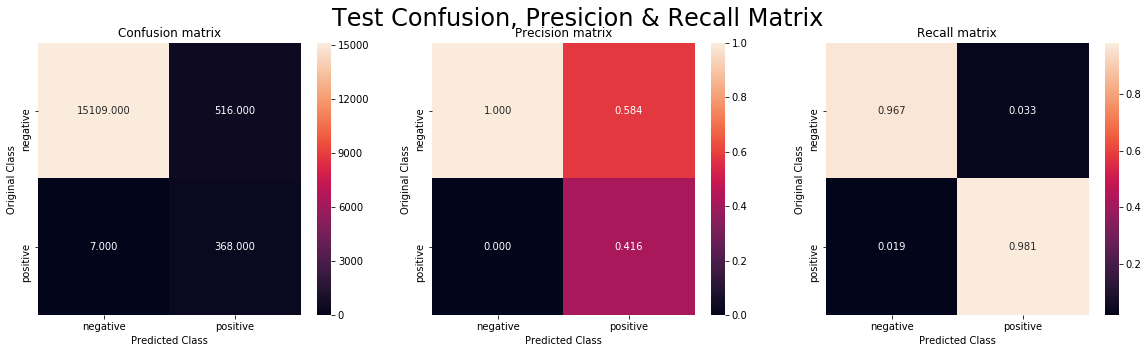

In [19]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

## 4.2.3. Mode Impute

In [44]:
cv = 10

In [45]:
X_train = pd.read_csv('train_mean.csv')
X_cv = pd.read_csv('cv_mean.csv')
X_test = pd.read_csv('test_mean.csv')


y_train = pd.read_csv('y_train.csv')['class']
y_cv = pd.read_csv('y_cv.csv')['class']
y_test = pd.read_csv('y_test.csv')['class']

In [46]:
X_train, y_train = SMOTE_oversmapling(X_train, y_train)

(100300, 170) (100300,)
[50150 50150]


### 4.2.3.1. Random Forest

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed: 10.8min remaining:   27.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.4min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=25, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=40, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


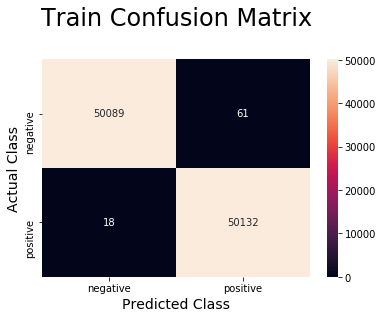

Train Cost:  9610
Test Cost:  41180


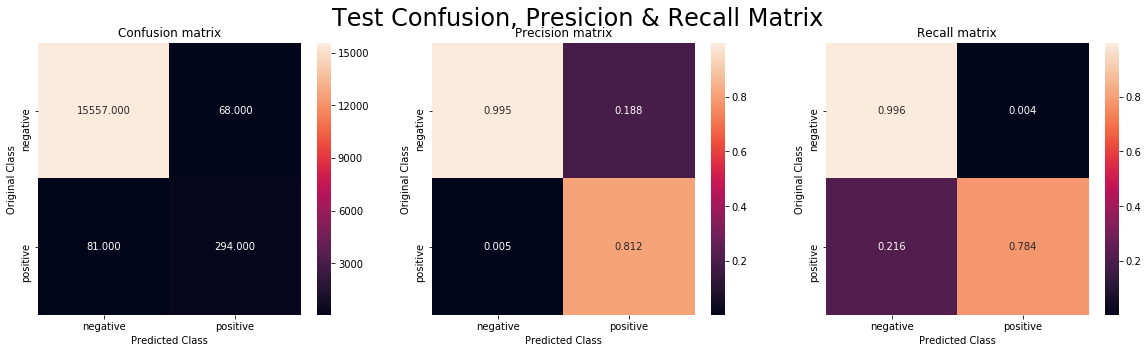

In [22]:
tuned_parameters = {"max_depth": [2, 3, 5, 8, 10, 15, 20, 25, 30, 40, 50],
              "n_estimators": [10, 20, 30, 40, 50, 80, 100, 150, 200],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
                "max_features": ['auto', 'sqrt', 'log2'],
                "class_weight": ['balanced', 'balanced_subsample', None]
             }
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rf, tuned_parameters, cv=cv, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(X_train, y_train)


print(clf.best_estimator_)

best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train), y_test, calib.predict(X_test))

100%|██████████| 1934/1934 [00:44<00:00, 43.11it/s]


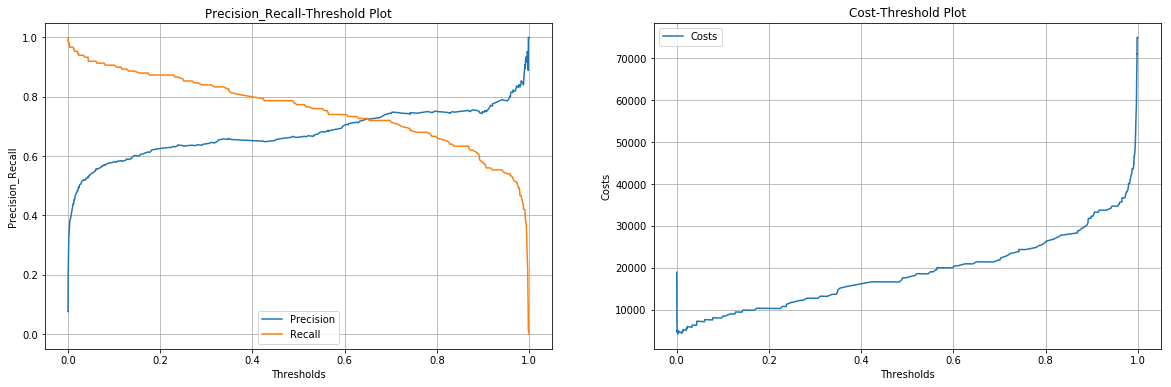

Best threshold: 0.0029
Min cost: 4170.00
Train Cost:  8660
Test Cost:  11160


In [23]:
threshold, cost = plot_precision_recall_costs(calib, X_cv, y_cv)

y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)

In [24]:
metric.append(["Mode","Random Forest", train_cost, cost, test_cost])

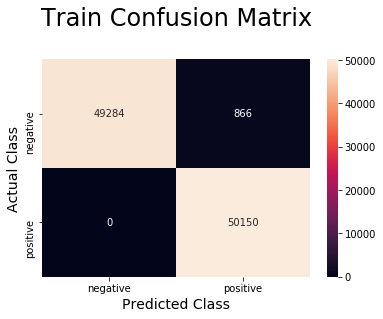

Train Cost:  8660
Test Cost:  11160


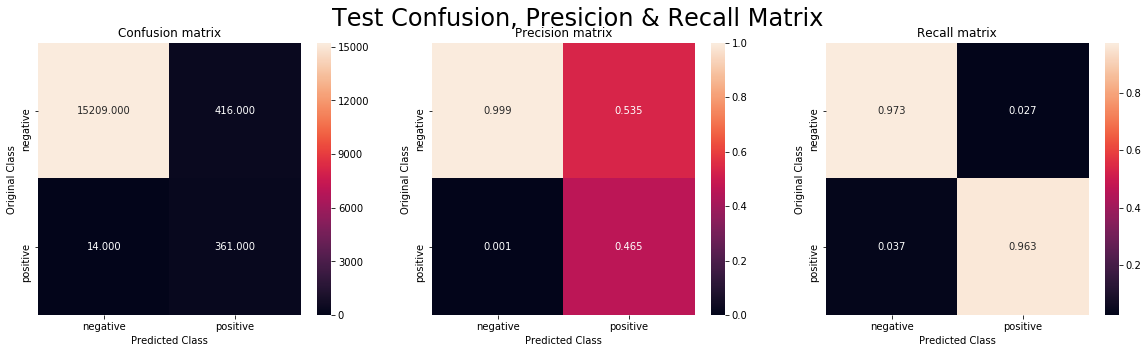

In [25]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

### 4.2.3.2 XGBoost

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  9.0min remaining:   22.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.3min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.5, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=25, min_child_weight=1, missing=None,
              n_estimators=20, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.3)


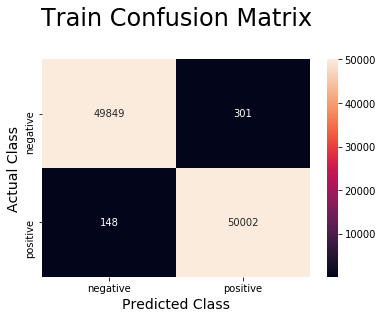

Train Cost:  77010
Test Cost:  23800


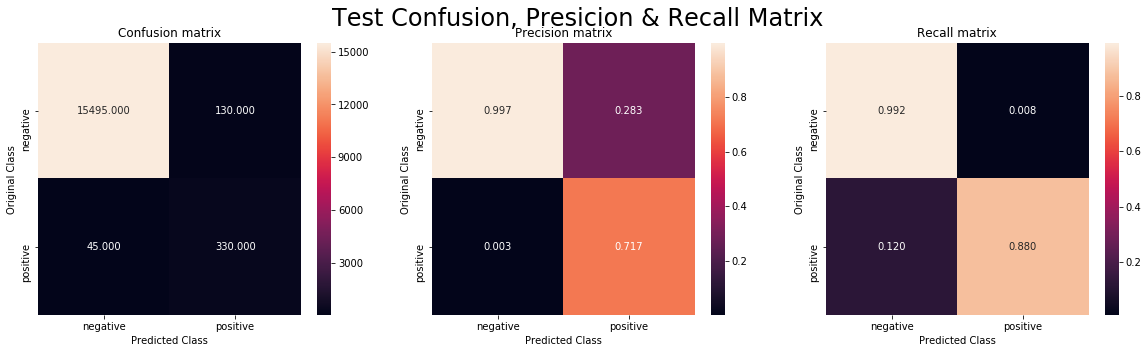

In [47]:
tuned_parameters = {"n_estimators": [10, 20, 30, 40, 50],
                   "max_depth" : [2, 3, 5, 10, 15, 20, 25, 30],
                    'colsample_bytree':[0.1,0.3,0.5,1],
                   'subsample':[0.1,0.3,0.5,1]}


xgbc = xgb.XGBClassifier(n_jobs = -1, random_state=42)
clf = RandomizedSearchCV(xgbc, tuned_parameters, cv=cv, scoring='recall', n_jobs = -1, verbose=10)
clf.fit(X_train, y_train)


print(clf.best_estimator_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=cv, method='sigmoid')
calib.fit(X_train, y_train)
plot_confusion_matrix(y_train, calib.predict(X_train), y_test, calib.predict(X_test))

100%|██████████| 1189/1189 [00:27<00:00, 42.96it/s]


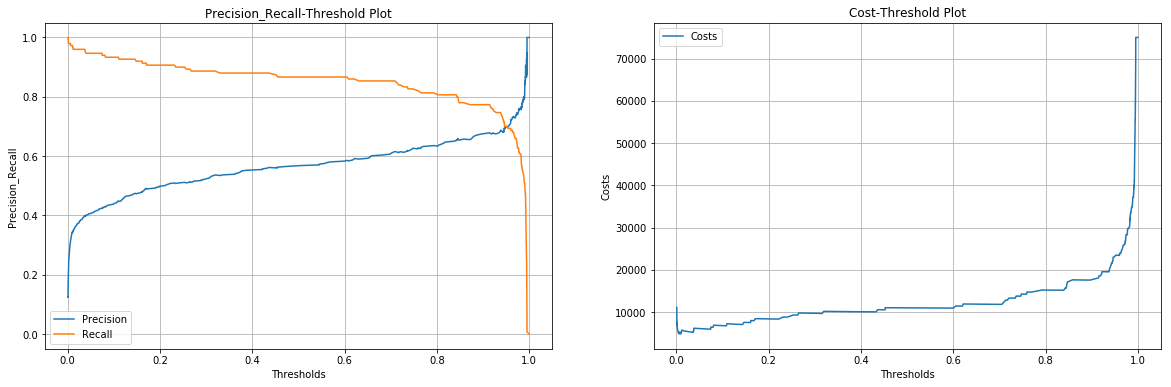

Best threshold: 0.0096
Min cost: 4790.00
Train Cost:  34470
Test Cost:  10070


In [53]:
threshold, cost = plot_precision_recall_costs(calib, X_cv, y_cv)

y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(X_test)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)

In [49]:
metric.append(["Mode","XGBoost", train_cost, cost, test_cost])

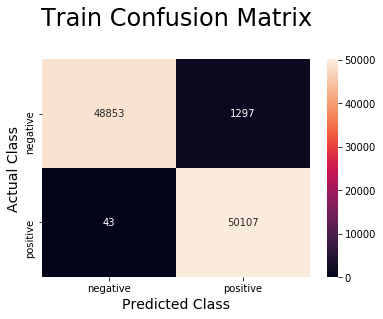

Train Cost:  34470
Test Cost:  10070


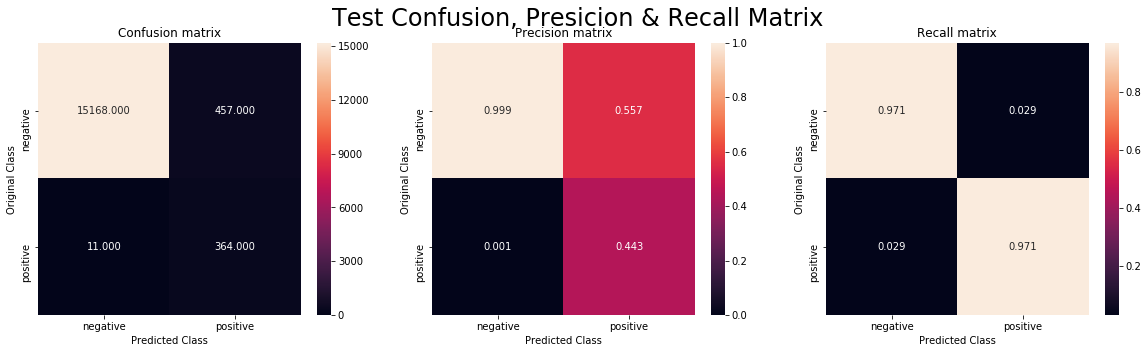

In [50]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

In [33]:
pickle.dump(metric, open("metric_ovs.pkl","wb"))

# 5. Conclusion

## 5.1. Imbalanced Data

In [34]:
metric = pickle.load(open("metric1.pkl","rb"))

In [35]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Impute", "Model", "Train Cost", "CV Cost", "Test Cost"]

for i in metric:
    x.add_row(i)
print(x)

+--------+---------------+------------+---------+-----------+
| Impute |     Model     | Train Cost | CV Cost | Test Cost |
+--------+---------------+------------+---------+-----------+
|  Mean  | Logistic Reg. |   59150    |   7770  |   15910   |
|  Mean  |    Lr. SVM    |   22160    |   6420  |   13640   |
|  Mean  | Random Forest |   33230    |   5750  |   13160   |
|  Mean  |    XGBoost    |   16980    |   5110  |   11690   |
| Median | Logistic Reg. |   60880    |   8040  |   16530   |
| Median |    Lr. SVM    |   35120    |   5950  |   12130   |
| Median | Random Forest |   33600    |   6010  |   12540   |
| Median |    XGBoost    |   15570    |   5150  |   11140   |
|  Mode  | Logistic Reg. |   61140    |   8000  |   16450   |
|  Mode  |    Lr. SVM    |   43090    |   6790  |   13990   |
|  Mode  | Random Forest |   57020    |   7110  |   15220   |
|  Mode  |    XGBoost    |   22160    |   5060  |   11150   |
+--------+---------------+------------+---------+-----------+


## 5.2. Oversampled Data

In [26]:
metric = pickle.load(open("metric_ovs.pkl","rb"))

In [35]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Impute", "Model", "Train Cost", "CV Cost", "Test Cost"]

for i in metric:
    x.add_row(i)
print(x)

+--------+---------------+------------+---------+-----------+
| Impute |     Model     | Train Cost | CV Cost | Test Cost |
+--------+---------------+------------+---------+-----------+
|  Mean  | Random Forest |    9760    |   4150  |   10300   |
|  Mean  |    XGBoost    |   15660    |   4500  |    9310   |
| Median | Random Forest |    7600    |   4080  |   11690   |
| Median |    XGBoost    |   13740    |   3700  |    8660   |
|  Mode  | Random Forest |    8660    |   4170  |   11160   |
|  Mode  |    XGBoost    |   34470    |   4790  |   10070   |
+--------+---------------+------------+---------+-----------+


**XGBoost model with median impute and oversampled data using SMOTE performing best.**
**Test Cost - 8660**